In [1]:
from transformers import pipeline
import pandas as pd
import numpy as np 

In [2]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

### Common columns
### Commons  -  "Title", "Category", "Price", "URL", "Subcategory","Description",'Business','Country', 'Location', 'Dimensions', 'Stock', 'DateOfListing', 'Imagefiles','LastUpOn'

#### Belgium 
'SellerID', 'SellersStockID'', 'Imagefiles',
'LastUpOn'', 'Weight', 'Weight_Units','Product_Units', 'Imagefile',
'Initial_Price', 'Latest_Price', 'Initial_Stock', 'Stock_Now',
'Condition', 'Dates_Available', 'Material', 'Technical',
'Collection', 'Price_Change', 'Quantity_Change', 
'Store', 'Language', 'Sold', 'Sold_After', 'material', 'dim',
'quantity_n'

#### French
'BIM_class', 'location',
'date_published', 'price_initial', 'price_latest', 'price_change',
'imagefiles', 'material_type', 'co2', 'avoided_waste',
'quantity_initial', 'quantity_latest', 'disappeared', 'country', 'sold',
'sold_after', 'city', 'deconstruction', 'state', 'constraints',
'images', 'distance', 'rseSummary', 'promotion',
'source', 'conditioning', 'rate', 'diag_it', 'showroom',
'avoidedWastes', 'trustLevel', 'quantity', 'min_quantity', 'end_date',
'pickup_start_date', 'pickup_end_date', 'deposit_mode',
'object', 'material', 'dim', 'quantity_n'

#### Swiss 
'['Imagefiles','LastUpOn'', 'Condition', 'eBKP_H',
       'eBKP_H_EN', 'MateriuumCategory','Material', 'Length', 'Width', 'Height',
       'Diameter', 'Weight', 'Color', 'Energy_Efficiency', 'Availability',
       'FirstPrice', 'PriceOnDemand', 'Quantity', 'Saved',
       'LastUpOn', 'PriceChange', 'Sold', 'SoldAfter', 'Provider',
       'Store', 'ID', 'Country', 'Language', 'Imagefile', 'URL',
       'eBKP_H_Generalized', 'ElementType', 'Price', 'Stock', 'Dimensions',
       'material', 'dim', 'quantity_n'],
      dtype='object'
#### Danish 
'ID', 'Imagefile','Thickness', 'Thickness_unit', 'Door frame', 'Quantity', 'LastPrice',
        'Saved', 'LastUpOn', 'Hanging', 'Width w/frame', 'Width w/frame_unit',
        'Height w/frame', 'Height w/frame_unit', 'Frame thickness',
        'Frame thickness_unit', 'FirstPrice', 'PriceChange',
        'Rail', 'Old glass', 'With corner band', 'Glass', 'Defective glass',
        'Material', 'Installed before', 'Year of manufacture_unit',
        'For built-in', 'Over rebated', 'With angle hinges', 'Connected',
        'With extender bar', 'Convectors', 'Convectors_unit', 'Suspension bracket', 'With thermostat',
        'Press tested', 'Store', ],

#### GERMANY 
 'Condition', 'MinAmount',
       'Location', 'Manufacturer', 'Properties', 'FirstPriceNumeric',
       'FirstAvailableNumeric', 'LastPriceNumeric', 'LastAvailableNumeric',
       'LastPrice', 'LastAvailable', 'Sold', 'SoldAfter'

#### UK 
'Name', 'URL', 'Price', 'Business', 'Category', 'Subcategory',
       'Country', 'Location', 'Description', 'Dimensions', 'Age', 'ItemID',
       'SellerID', 'SellersStockID', 'DateOfListing', 'Imagefiles',
       'LastUpOn'

# Merge everything 

- Give you the list of common columns 
- EPD Again and look more tourghly


In [111]:

ifc = pd.read_csv("data/IFC_processed.csv")

belgium = pd.read_csv("data/belgian_.csv")
french = pd.read_csv("data/french1.csv")
swiss = pd.read_csv("data/swiss_.csv")
danish = pd.read_json("data/dk_data.json")
german = pd.read_json('data/german1.json')
uk = pd.read_json('data/uk_data.json')

uni_mat_ma = pd.read_excel("data/Uniclass2015_Ma_v1_1.xlsx", header=2)
uni_mat_pr = pd.read_excel("data/Uniclass2015_Pr.xlsx", header=2)

In [4]:
ENCODING = False
if ENCODING:
    belgium_embeddings = model.encode(belgium["Title"])
    french_embeddings = model.encode(french["title"])
    swiss_embeddings = model.encode(swiss["Title"])
    danish_embeddings = model.encode(danish["Title"])
    german_embeddings = model.encode(german["Title"])
    uk_embeddings = model.encode(uk["Name"])

    embeddings = model.encode(ifc.IFC)
    embeddings_uni = model.encode(uni_mat_pr.Title)
    embeddings_uni_ma = model.encode(uni_mat_ma.Title)
    
    np.save('data/embeddings.npy', embeddings)
    np.save('data/embeddings_uni.npy', embeddings_uni)
    np.save('data/embeddings_uni_ma.npy', embeddings_uni_ma)
    np.save('data/belgium_embeddings.npy', belgium_embeddings)
    np.save('data/french_embeddings.npy', french_embeddings)
    np.save('data/swiss_embeddings.npy', swiss_embeddings)
    np.save('data/danish_embeddings.npy', danish_embeddings)
    np.save('data/german_embeddings.npy', german_embeddings)
    np.save('data/uk_embeddings.npy', uk_embeddings)



In [112]:
embeddings = np.load('data/embeddings.npy')
embeddings_uni =np.load('data/embeddings_uni.npy')
embeddings_uni_ma =np.load('data/embeddings_uni_ma.npy')

belgium_embeddings =np.load('data/belgium_embeddings.npy')
french_embeddings =np.load('data/french_embeddings.npy')
swiss_embeddings =np.load('data/swiss_embeddings.npy')
danish_embeddings = np.load('data/danish_embeddings.npy')
german_embeddings = np.load('data/german_embeddings.npy')
uk_embeddings = np.load('data/uk_embeddings.npy')


In [113]:
from sklearn.metrics.pairwise import cosine_similarity


codes = pd.DataFrame(pd.concat([uni_mat_ma.Title], axis=0))
codes = codes.reset_index(drop=True)
codes.columns = ["raw"]

belgium_similarity = cosine_similarity(belgium_embeddings, embeddings_uni_ma)
french_similarity = cosine_similarity(french_embeddings, embeddings_uni_ma)
swiss_similarity = cosine_similarity(swiss_embeddings, embeddings_uni_ma)
danish_similarity = cosine_similarity(danish_embeddings, embeddings_uni_ma)
german_similarity = cosine_similarity(german_embeddings, embeddings_uni_ma)
uk_similarity = cosine_similarity(uk_embeddings, embeddings_uni_ma)


num_top_indices = 1 

top_indices_belgium = [np.argmax(row) for row in belgium_similarity]
top_indices_french = [np.argmax(row) for row in french_similarity]
top_indices_swiss = [np.argmax(row) for row in swiss_similarity]
top_indices_danish = [np.argmax(row) for row in danish_similarity]
top_indices_german = [np.argmax(row) for row in german_similarity]
top_indices_uk = [np.argmax(row) for row in uk_similarity]


belgium_raw_values = codes.iloc[top_indices_belgium]['raw'].tolist()
french_raw_values = codes.iloc[top_indices_french]['raw'].tolist()
swiss_raw_values = codes.iloc[top_indices_swiss]['raw'].tolist()
danish_raw_values = codes.iloc[top_indices_danish]['raw'].tolist()
german_raw_values = codes.iloc[top_indices_german]['raw'].tolist()
uk_raw_values = codes.iloc[top_indices_uk]['raw'].tolist()


# Add these as new columns to your DataFrame
belgium['material_emb'] = belgium_raw_values
french['material_emb'] = french_raw_values
swiss['material_emb'] = swiss_raw_values
danish['material_emb'] = danish_raw_values
german['material_emb'] = german_raw_values
uk['material_emb'] = uk_raw_values

In [149]:
codes[codes.raw ==  "g fa"]

,raw
1046,g fa


In [116]:
from sklearn.metrics.pairwise import cosine_similarity


codes = pd.DataFrame(pd.concat([ifc.IFC, uni_mat_pr.Title], axis=0))
codes = codes.reset_index(drop=True)
codes.columns = ["raw"]

result = np.concatenate([embeddings, embeddings_uni], axis=0)

belgium_similarity = cosine_similarity(belgium_embeddings, result)
french_similarity = cosine_similarity(french_embeddings, result)
swiss_similarity = cosine_similarity(swiss_embeddings, result)
danish_similarity = cosine_similarity(danish_embeddings, result)
german_similarity = cosine_similarity(german_embeddings, result)
uk_similarity = cosine_similarity(uk_embeddings, result)


num_top_indices = 1  

top_indices_belgium = [np.argmax(row) for row in belgium_similarity]
top_indices_french = [np.argmax(row) for row in french_similarity]
top_indices_swiss = [np.argmax(row) for row in swiss_similarity]
top_indices_danish = [np.argmax(row) for row in danish_similarity]
top_indices_german = [np.argmax(row) for row in german_similarity]
top_indices_uk = [np.argmax(row) for row in uk_similarity]


belgium_raw_values = codes.iloc[top_indices_belgium]['raw'].tolist()
french_raw_values = codes.iloc[top_indices_french]['raw'].tolist()
swiss_raw_values = codes.iloc[top_indices_swiss]['raw'].tolist()
danish_raw_values = codes.iloc[top_indices_danish]['raw'].tolist()
german_raw_values = codes.iloc[top_indices_german]['raw'].tolist()
uk_raw_values = codes.iloc[top_indices_uk]['raw'].tolist()


# Add these as new columns to your DataFrame
belgium['Belgium_Raw'] = belgium_raw_values
french['French_Raw'] = french_raw_values
swiss['Swiss_Raw'] = swiss_raw_values
danish['Danish_Raw'] = danish_raw_values
german['German_Raw'] = german_raw_values
uk['Uk_Raw'] = uk_raw_values

In [8]:
unique_count_german = german['German_Raw'].value_counts()
unique_count_german.head(20)

door                     206
sleevi ng                144
window                   114
Sprinklers                87
Scagliola                 75
Arrises                   73
balustrade                65
Window walls              64
Grommets                  61
Lacquers                  58
Washbasin spouts          57
Pendant luminaires        53
turnstile                 48
parapet                   47
Trellises                 41
Plastics window films     39
Sedge                     37
rafter                    37
staple                    35
diverting                 35
Name: German_Raw, dtype: int64

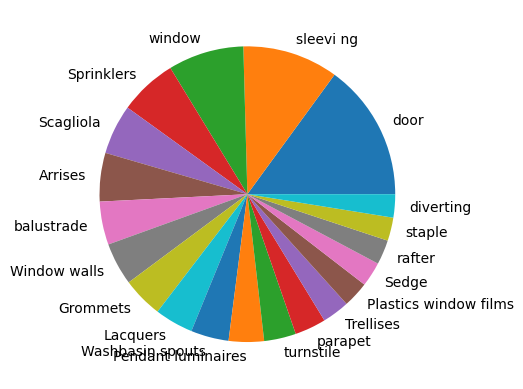

In [123]:
fig, ax = plt.subplots()
best_20 = unique_count_german.head(20)
ax.pie(best_20, labels=best_20.keys())
plt.show()

In [124]:
unique_count = belgium['Belgium_Raw'].value_counts()
unique_count.head(20)

Wood panelled door leaves           141
light  fixture                       95
Pendant luminaires                   92
Cabinet and countertop hinges        63
Terrazzo tiles                       57
Wood door frames                     41
Ceiling light switches               31
Glass brise-soleil louvre blades     26
Handblown crown glass                25
chair                                23
Bonding coats                        22
Bathroom cabinets                    21
Stone tiles                          19
Laminboard core plywoods             15
Sinks                                15
Wood doorsets                        14
Aluminium alloy hinged bollards      14
Stainless steel door leaves          13
Pedestal washbasins                  13
Ceramic tiles                        13
Name: Belgium_Raw, dtype: int64

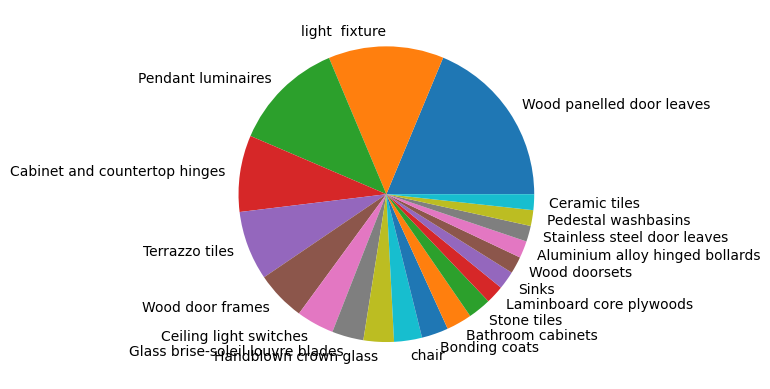

In [125]:
fig, ax = plt.subplots()
best_20 = unique_count.head(20)
ax.pie(best_20, labels=best_20.keys())
plt.show()

In [10]:
unique_count_french = french['French_Raw'].value_counts()
unique_count_french.head(20)

Arrises                     325
Pliable conduit             307
door                        210
Clamp brackets              171
Double slips                171
Sliding shutter doorsets    136
Pendant luminaires          134
Water heaters               129
abutment                    128
tee                         123
Sedge                       112
table                        99
chair                        99
electrical                   93
Radiators                    87
Lamprey tiles                85
parapet                      81
Lacquers                     79
Murals                       77
staple                       73
Name: French_Raw, dtype: int64

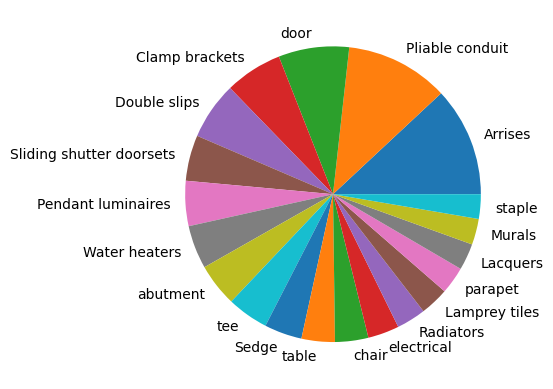

In [122]:
fig, ax = plt.subplots()
best_20 = unique_count_french.head(20)
ax.pie(best_20, labels=best_20.keys())
plt.show()

In [11]:
unique_count = swiss['Swiss_Raw'].value_counts()
unique_count.head(20)

Pedestal washbasins    197
sleevi ng              131
refrigerator            97
Window walls            89
WC pans                 86
Sprinklers              76
Arrises                 74
Scagliola               69
chute conveyor          69
door                    60
Radiators               58
trochoi dal             57
staple                  57
Pendant luminaires      51
turnstile               51
Grommets                50
balustrade              49
Lacquers                44
Glazed structures       39
spool                   38
Name: Swiss_Raw, dtype: int64

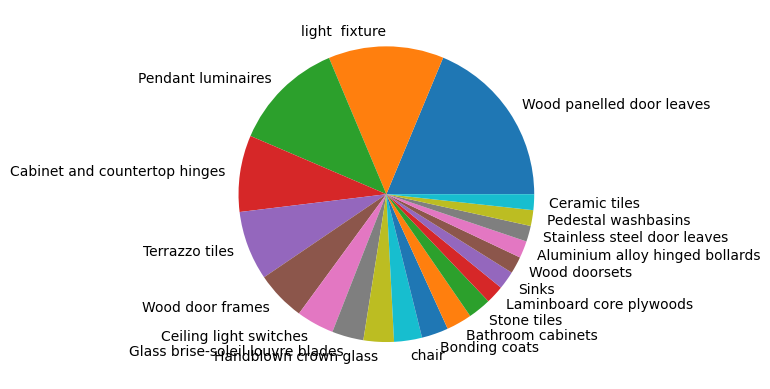

In [126]:
fig, ax = plt.subplots()
best_20 = unique_count.head(20)
ax.pie(best_20, labels=best_20.keys())
plt.show()

In [12]:
unique_count_danish = danish['Danish_Raw'].value_counts()
unique_count_danish.head(20)

door                               476
Uncontrolled door closers          420
Frameless glass door leaves        138
sleevi ng                          113
trap  door                          93
Sprigs                              80
Arrises                             78
Window hinges                       77
staple                              76
Pendant luminaires                  66
Nave lecterns                       61
Sedge                               60
Tilt meters                         58
thermal                             57
Scagliola                           56
turnstile                           54
Window walls                        53
Glass infill gate leaves            52
parapet                             50
Wood brise-soleil louvre blades     49
Name: Danish_Raw, dtype: int64

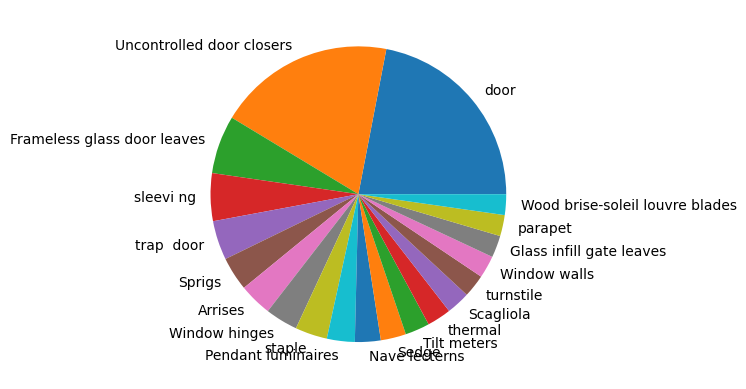

In [127]:
fig, ax = plt.subplots()
best_20 = unique_count_danish.head(20)
ax.pie(best_20, labels=best_20.keys())
plt.show()

In [129]:
unique_count = uk['Uk_Raw'].value_counts()
unique_count.head(20)

Fireplace hearths                             149
Wood door frames                               81
Fireplace surrounds                            74
Cast iron bollards                             52
Cast iron columns                              45
Worktops                                       42
work surface                                   28
Inset open fireplace surrounds and hearths     28
Stainless steel chimney pots                   25
Statuary                                       23
Chandeliers                                    22
Clay chimney pots                              18
Antique glass                                  18
Wood doorsets                                  17
Wood architraves                               17
Masonry dowels                                 16
Wood panelled door leaves                      16
Radiator enamels                               15
Kitchen worktops                               14
Galvanized steel fire buckets                  12


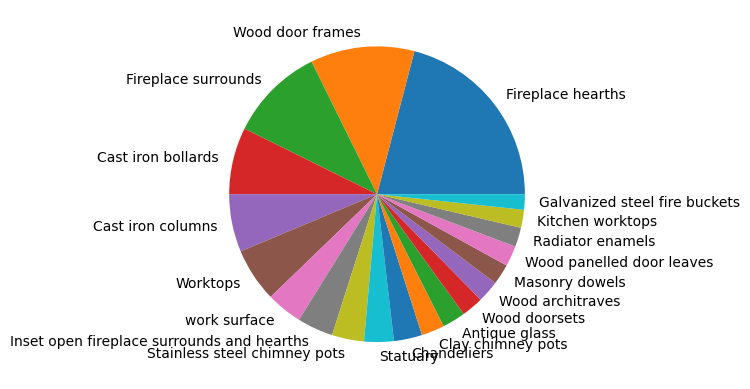

In [130]:
fig, ax = plt.subplots()
best_20 = unique_count.head(20)
ax.pie(best_20, labels=best_20.keys())
plt.show()

### Germany


In [152]:
german['SoldAfterDays'] = german['SoldAfter'] / 86400000 
german

,Nr,URL,Title,Category,Subcategory,Saved,LastUpOn,Description,Zustand,FirstPrice,...,LastPriceNumeric,LastAvailableNumeric,LastPrice,LastAvailable,Sold,SoldAfter,Imagefile,material_emb,German_Raw,SoldAfterDays
0,121613,https://restado.de/baustoff/eigenbau/,Eigenbau,Türen & Zargen,Außentüren,1673222400000,NaN,Biete hier eine Hauseingangstür Eigenbau Massi...,Neuwertig,1€ (VB) / Stück,...,1.00,1.0,1€ (VB) / Stück,1 Stück verfügbar,0.0,NaN,[https://restado.de/wp-content/uploads/product...,Encaustic,building,NaN
1,120516,https://restado.de/baustoff/stabile-holztuer/,Stabile Holztür,Türen & Zargen,Außentüren,1673222400000,1.673568e+12,None,None,None,...,NaN,NaN,None,None,1.0,3.456000e+08,[https://restado.de/wp-content/uploads/product...,Wood,Wood door frames,4.0
2,119623,https://restado.de/baustoff/haustuere-2-teilig...,Haustüre 2-teilig SCHÜKO,Türen & Zargen,Außentüren,1673222400000,1.684973e+12,Hochwertige Terrassen-/Balkontüre wurde einmal...,Neu,2.300€ (VB) / Stück,...,2300.00,1.0,2.300€ (VB) / Stück,1 Stück verfügbar,1.0,1.175040e+10,[https://restado.de/wp-content/uploads/product...,Sitka spruce,Doorsets,136.0
3,117860,https://restado.de/baustoff/bayerwald/,Bayerwald,Türen & Zargen,Außentüren,1673222400000,NaN,Biete eine Bayerwald Holzhaustüre (Ausstellung...,Neu,999€ (VB) / Stück,...,999.00,1.0,999€ (VB) / Stück,1 Stück verfügbar,0.0,NaN,[https://restado.de/wp-content/uploads/product...,Wychert,miter,NaN
4,117707,https://restado.de/baustoff/tuer-7/,Tür,Türen & Zargen,Außentüren,1673222400000,NaN,,Gebraucht,200€ (VB) / Stück,...,200.00,1.0,200€ (VB) / Stück,1 Stück verfügbar,0.0,NaN,[https://restado.de/wp-content/uploads/product...,Encaustic,door,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,138206,https://restado.de/baustoff/bergmann-unipor-pl...,Bergmann Unipor Planziegel W 16,Rohbau,Mauerwerk,1697673600000,NaN,Klebemörtel nicht mehr verwendbar.,Neu,"1,80€ (VB) / Stück",...,1.80,NaN,None,None,0.0,NaN,[],Wychert,twintowerenthalpyrecovery loops,NaN
3967,138028,https://restado.de/baustoff/knauf-3/,Knauf,Fassade,Fassadendämmung,1696896000000,NaN,Knauf WDVS Grau 1000x500x160mm B1-WLG 034 Hart...,Neu,3.648€ (VB) Paketpreis,...,3648.00,NaN,None,None,0.0,NaN,[https://restado.de/wp-content/uploads/product...,Pisé,quay,NaN
3968,111849,https://restado.de/baustoff/fassafassadenverkl...,FassaFassadenverkleidung für den Innen und Auß...,Fassade,Fassadenverkleidung,1697587200000,NaN,Lassen Sie Ihre Idee von einer perfekten Fassa...,Neu,"8,21€ / Stück",...,8.21,50.0,"8,21€ / Stück",50 Stück verfügbar,0.0,NaN,[https://restado.de/wp-content/uploads/product...,Resin,cladding,NaN
3969,138176,https://restado.de/baustoff/dekorative-holzunt...,Dekorative Holzuntersetzer Platten,Innenausbau,Sonstiges,1697414400000,NaN,"Marke: Novus Zustand: neu, OVP, A-Ware *****...",Neu,"0,65€ (VB) / Stück",...,0.65,NaN,None,None,0.0,NaN,[https://restado.de/wp-content/uploads/product...,Decorative aggregates,Decorative timber panels,NaN


In [153]:
stock_revamp = []
for index, row in german.iterrows():
    if row.LastAvailableNumeric > row.FirstAvailableNumeric:
        stock_revamp.append(index)

german["StockChange"] = german.LastAvailableNumeric - german.FirstAvailableNumeric


german_date = []
count_entity = []
price_sold = []
for item in german.German_Raw.unique():
    german_df = german.dropna(subset="SoldAfterDays")
    date = german_df.SoldAfterDays[german_df.German_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    german_date.append(np.mean(date))

df = pd.DataFrame({"German_Raw": german.German_Raw.unique(), "SoldAfterDays": german_date, "CountEntity":count_entity}).dropna()

In [154]:
# Unique Germain Categories and Sub categories
print(german.Subcategory.unique())
print(german.Category.unique())

['Außentüren' 'Wohnungseingangstür' 'Sonstiges' 'Zimmertüren'
 'Dachfenster' 'Aussenfenster' 'Sonstiges·' 'Betonwerkstein' 'Naturstein'
 'Fliesen' 'Dacheindeckung' 'Dachdämmung' 'Konstruktiver Holzbau'
 'Sanitär' 'Lüftungsbau' 'Elektroarbeiten' 'Heizungsbau'
 'Baulicher Feuchteschutz' 'Mauerwerk' 'Dämmung' 'Fassadendämmung'
 'Fassadenverkleidung' 'Sonstiges Fassadenmaterial' 'Parkett'
 'Bodenbeläge' 'Innentreppen' 'Trockenbau' 'Estrich' 'Innenputz'
 'Spachtelmassen & Kleber' 'Terrassenbeläge' 'Zaun & Mauersysteme'
 'Gartengestaltung' 'Strassen- und wegebau' 'Baumaschinen & Baugeräte'
 'Tore' 'Aussenputz']
['Türen & Zargen' 'Fenster' 'Fliesen & Steine' 'Dach'
 'Haustechnik & Sanitär' 'Rohbau' 'Fassade' 'Innenausbau'
 'Garten & Freianlagen' 'Werkzeuge & Maschinen']


SUBCategories  - array(['Exterior doors', 'Apartment entrance door', 'Other', 'Room doors',
        'Roof window', 'Exterior window', 'Other', 'Concrete stone',
        'Natural stone', 'tiles', 'roofing', 'roof insulation',
        'Constructive timber construction', 'sanitary', 'ventilation construction',
        'Electrical work', 'Heating construction', 'Structural moisture protection',
        'Masonry', 'insulation', 'facade insulation', 'facade cladding',
        'Other facade materials', 'parquet', 'floor coverings',
        'Interior stairs', 'drywall', 'screed', 'interior plaster',
        'Fillers & Glues', 'Terrace Coverings',
        'Fence & wall systems', 'Garden design', 'Road and path construction',
        'Construction machinery & equipment', 'Gates', 'Exterior plastering'], dtype=object)

Categories - array(['Doors & Frames', 'Windows', 'Tiles & Stones', 'Roof',
        'Building technology & plumbing', 'shell construction', 'facade', 'interior fittings',
        'Garden & Outdoor Spaces', 'Tools & Machines'], dtype=obje

In [155]:
german.dropna(subset=["LastPriceNumeric"])
german = german[~german["Subcategory"].isin(['Gartengestaltung', 'Baumaschinen & Baugeräte'])]

In [156]:
german.columns

Index(['Nr', 'URL', 'Title', 'Category', 'Subcategory', 'Saved', 'LastUpOn',
       'Description', 'Zustand', 'FirstPrice', 'FirstAvailable', 'MinAmount',
       'Location', 'Hersteller', 'Properties', 'FirstPriceNumeric',
       'FirstAvailableNumeric', 'LastPriceNumeric', 'LastAvailableNumeric',
       'LastPrice', 'LastAvailable', 'Sold', 'SoldAfter', 'Imagefile',
       'material_emb', 'German_Raw', 'SoldAfterDays', 'StockChange'],
      dtype='object')

In [157]:
revenue = np.sum(german.LastPriceNumeric[~german.LastPriceNumeric.isna()])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 5482589.01


In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


# Identify categorical columns and convert them to dummy variables
categorical_columns = ['Category', 'Subcategory', 'Location', 'Hersteller', 'German_Raw',"material_emb"]  # Update with your categorical columns
german.Sold[german.SoldAfter!=1] = 0
german.Sold[german.SoldAfter>0] = 1

df = german[categorical_columns].copy()


df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target
X = pd.concat([german.LastPriceNumeric, df_dummies], axis=1) # Replace 'Sold' with your target column name
y = german['Sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy: 0.9253539253539254
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       507
         1.0       0.91      0.87      0.89       270

    accuracy                           0.93       777
   macro avg       0.92      0.91      0.92       777
weighted avg       0.93      0.93      0.93       777



In [159]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display
display(feature_importances[:30])


,Feature,Importance
381,Location_D-28217 Bremen,0.186445
3,Category_Fenster,0.126934
31,Subcategory_Naturstein,0.081623
5,Category_Garten & Freianlagen,0.063066
14,Subcategory_Betonwerkstein,0.043358
27,Subcategory_Innentreppen,0.031207
40,Subcategory_Tore,0.028994
42,Subcategory_Wohnungseingangstür,0.027653
39,Subcategory_Terrassenbeläge,0.026524
4,Category_Fliesen & Steine,0.022554


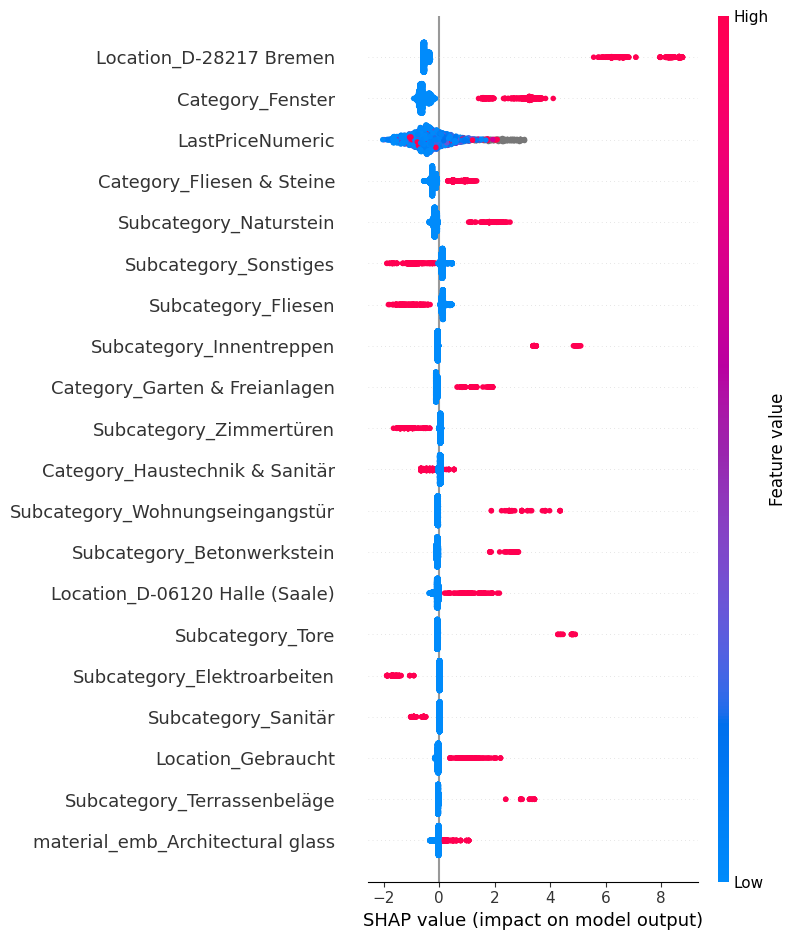

In [160]:
import shap

explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)


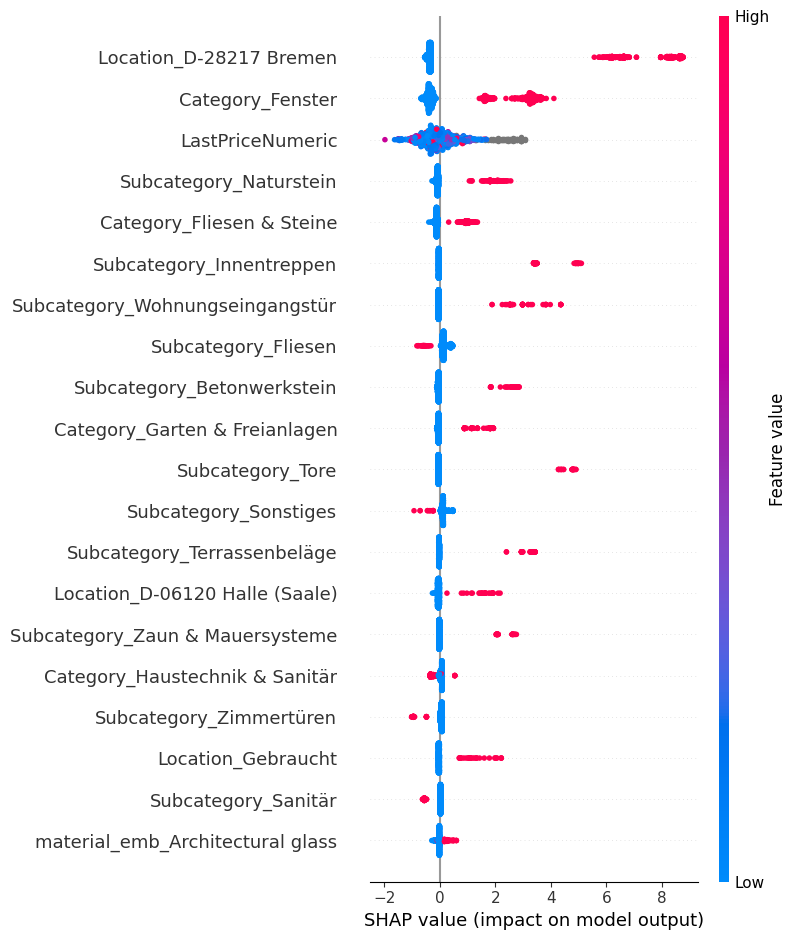

In [161]:
# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

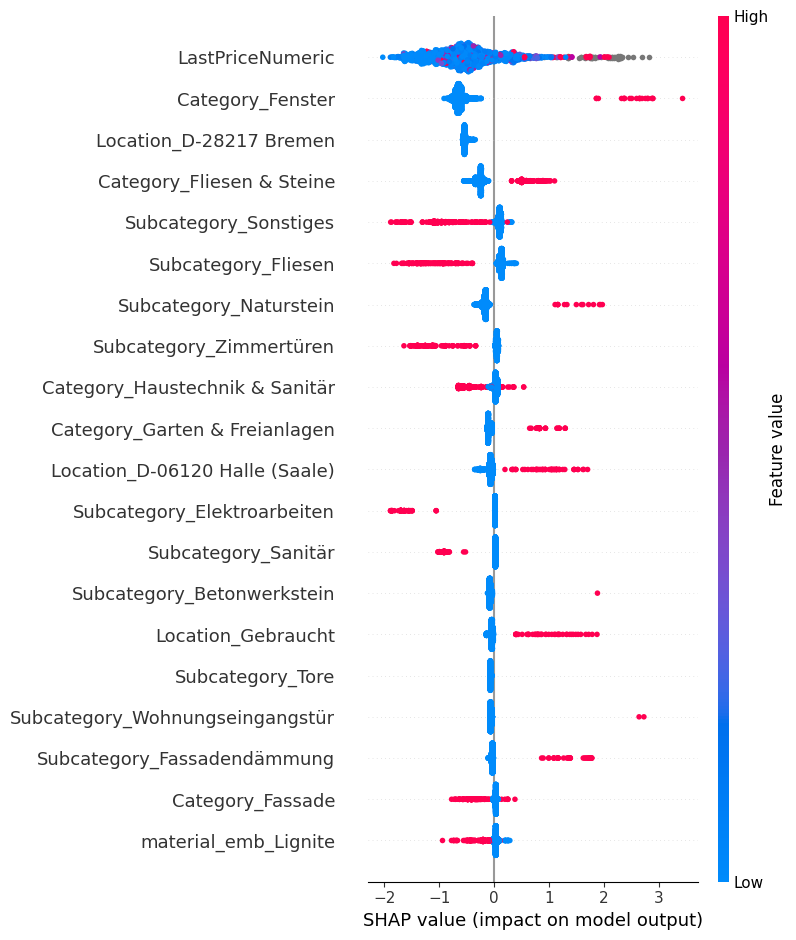

In [162]:
# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

In [163]:
german.columns

Index(['Nr', 'URL', 'Title', 'Category', 'Subcategory', 'Saved', 'LastUpOn',
       'Description', 'Zustand', 'FirstPrice', 'FirstAvailable', 'MinAmount',
       'Location', 'Hersteller', 'Properties', 'FirstPriceNumeric',
       'FirstAvailableNumeric', 'LastPriceNumeric', 'LastAvailableNumeric',
       'LastPrice', 'LastAvailable', 'Sold', 'SoldAfter', 'Imagefile',
       'material_emb', 'German_Raw', 'SoldAfterDays', 'StockChange'],
      dtype='object')

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


german_reg = german.dropna(subset=['SoldAfterDays'])
# Identify categorical columns and convert them to dummy variables
categorical_columns = ['Category', 'Subcategory', 'material_emb', 'German_Raw']
numeric_columns = ['LastPriceNumeric']

df = german_reg[categorical_columns].copy()

df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target
X = pd.concat([german_reg.LastPriceNumeric, df_dummies], axis=1) # Replace 'Sold' with your target column name
y = german_reg['SoldAfterDays']  # Target variable
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_regression

# Evaluate the predictions
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

mae, r2

(14.936538862719617, 0.742460313236621)

In [165]:
# Calculate the range (max - min) of the target variable
y_range = y_test.max() - y_test.min()

# Calculate the standard deviation of the target variable
y_std = y_test.std()

# Calculate MAE as a percentage of the mean of the target variable
mae_percentage = (mae / y_test.mean()) * 100

mae, y_range, y_std, mae_percentage

(14.936538862719617, 236.0, 52.18372772205045, 19.0953811946248)

Predicting the number of days to be sold is not good

In [184]:
sum(german.LastAvailableNumeric.isna())

616

In [168]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


german_date = []
count_entity = []
price_sold = []
cate = []
sub_cate = []

for item in german.German_Raw.unique():
    german_df = german.dropna(subset="SoldAfterDays")
    date = german_df.SoldAfterDays[german_df.German_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    german_date.append(np.mean(date))
    

df = pd.DataFrame({"German_Raw": german.German_Raw.unique(), "SoldAfterDays": german_date, "CountEntity":count_entity}).dropna()


In [178]:
df = df[df.CountEntity > 1]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = (df['Rank_SoldAfterDays'] + df['Rank_CountEntity'])/2

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)

In [179]:
# Best German objects
successful_objects[['German_Raw', 'SoldAfterDays', 'CountEntity', 'Score']][:15]

,German_Raw,SoldAfterDays,CountEntity,Score
132,Plastics window films,40.945946,37,18.5
20,Aluminium window units,13.571429,7,18.5
26,window,45.145631,103,22.0
16,Window walls,48.365385,52,28.0
229,Dimensioned stones,37.571429,7,28.5
800,Garage door operators,25.750000,4,29.5
24,Wood window walls,42.545455,11,30.0
111,Surface luminaires,28.250000,4,30.5
5,trochoi dal,37.333333,6,31.0
173,revetment,29.250000,4,31.5


In [ ]:
df = df[df.CountEntity > 1]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = (df['Rank_SoldAfterDays'] + df['Rank_CountEntity'])/2

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)

In [177]:
# Worst German objects
worst_objects = df.sort_values(by='Score', ascending=False)
worst_objects[['German_Raw', 'SoldAfterDays', 'CountEntity', 'Score']][:15]

,German_Raw,SoldAfterDays,CountEntity,Score
515,Medical and laboratory equipment,235.0,2,134.0
776,Concretes,227.0,2,133.5
619,Metal skirtings,224.0,2,133.0
351,Stethosets,195.5,2,132.5
44,Frameless glass door leaves,184.0,2,132.0
778,Garden sheds,172.0,2,131.0
592,Boiler superheaters,171.5,2,130.5
465,light fixture,166.0,2,130.0
278,Bitumen primers,141.0,2,129.0
266,Ceramic tile borders,137.0,2,128.5


In [ ]:
df = df[df.CountEntity > 1]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = (df['Rank_SoldAfterDays'] + df['Rank_CountEntity'])/2

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)

 to find the mininum and maximum for the time and minimum and maximum for the amount of all sold components on the marketplace (components, not lamps, furniture etc) - the worst result - 0% (not sold for a maximum available period of time, e.x. 365 days), 1% sold only 1 piece for a maximum amount of time comparing other components, and 100% for the best result (e.g. sold in one day). The simliar procent for amount: not sold - 0%, sold 1 piece - 1%, sold the maximum we see for some component, e.g. 88, assign as 100%. So, on a scale 0-1 we will have for every components’ group % for amount and time. E.g. for some X components 30% time, 50% amount, then we divide it by these 2 variables, meaning (0.3+0.5)/2


"The simliar procent for amount: not sold - 0%, sold 1 piece - 1%

Selling a 100 tiles (quantity) will be ranked hired than the sale of one generator even if they have the same price



In [186]:
german.columns

Index(['Nr', 'URL', 'Title', 'Category', 'Subcategory', 'Saved', 'LastUpOn',
       'Description', 'Zustand', 'FirstPrice', 'FirstAvailable', 'MinAmount',
       'Location', 'Hersteller', 'Properties', 'FirstPriceNumeric',
       'FirstAvailableNumeric', 'LastPriceNumeric', 'LastAvailableNumeric',
       'LastPrice', 'LastAvailable', 'Sold', 'SoldAfter', 'Imagefile',
       'material_emb', 'German_Raw', 'SoldAfterDays', 'StockChange'],
      dtype='object')

In [187]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


german_date = []
count_entity = []
price_sold = []
cate = []
sub_cate = []
german_amount = []

for item in german.German_Raw.unique():
    german_df = german.dropna(subset="SoldAfterDays")
    date = german_df.SoldAfterDays[german_df.German_Raw == item]
    amount = german_df.LastAvailableNumeric[german_df.German_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    german_date.append(np.mean(date))
    german_amount.append(np.mean(amount))
    

df = pd.DataFrame({"German_Raw": german.German_Raw.unique(), "SoldAfterDays": german_date, "CountEntity":count_entity, "Average Amount":german_amount}).dropna()

In [194]:
df = df[df.CountEntity > 1]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)
df['Rank_Average_Amount'] = df['Average Amount'].rank(method='min', ascending=False)

# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = (df['Rank_SoldAfterDays'] + df['Rank_Average_Amount']+ df['Rank_CountEntity'])/3

# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)

In [197]:
successful_objects[["German_Raw", "Score"]][:30]

,German_Raw,Score
218,Stone slabs,25.333333
229,Dimensioned stones,27.333333
208,Glazed structures,33.333333
23,Arrises,35.000000
19,Sprinklers,35.000000
70,Scuttles,35.666667
26,window,35.666667
139,Trellises,36.666667
237,Natural stone quoins,36.666667
200,Grommets,41.333333


In [198]:
successful_objects[["German_Raw", "Score"]][-30:-1]

,German_Raw,Score
330,girder,100.333333
188,Hardware products,100.333333
515,Medical and laboratory equipment,100.333333
408,wash handbasin,100.333333
255,Espagnolette bolts,101.000000
197,spool,101.333333
278,Bitumen primers,102.666667
403,shower,103.000000
13,Aluminium doorsets,103.666667
443,Ethylene propylene diene monomer (EPDM) gaskets,103.666667


Anton didn't at he same time so try to dicriminate for that in another file

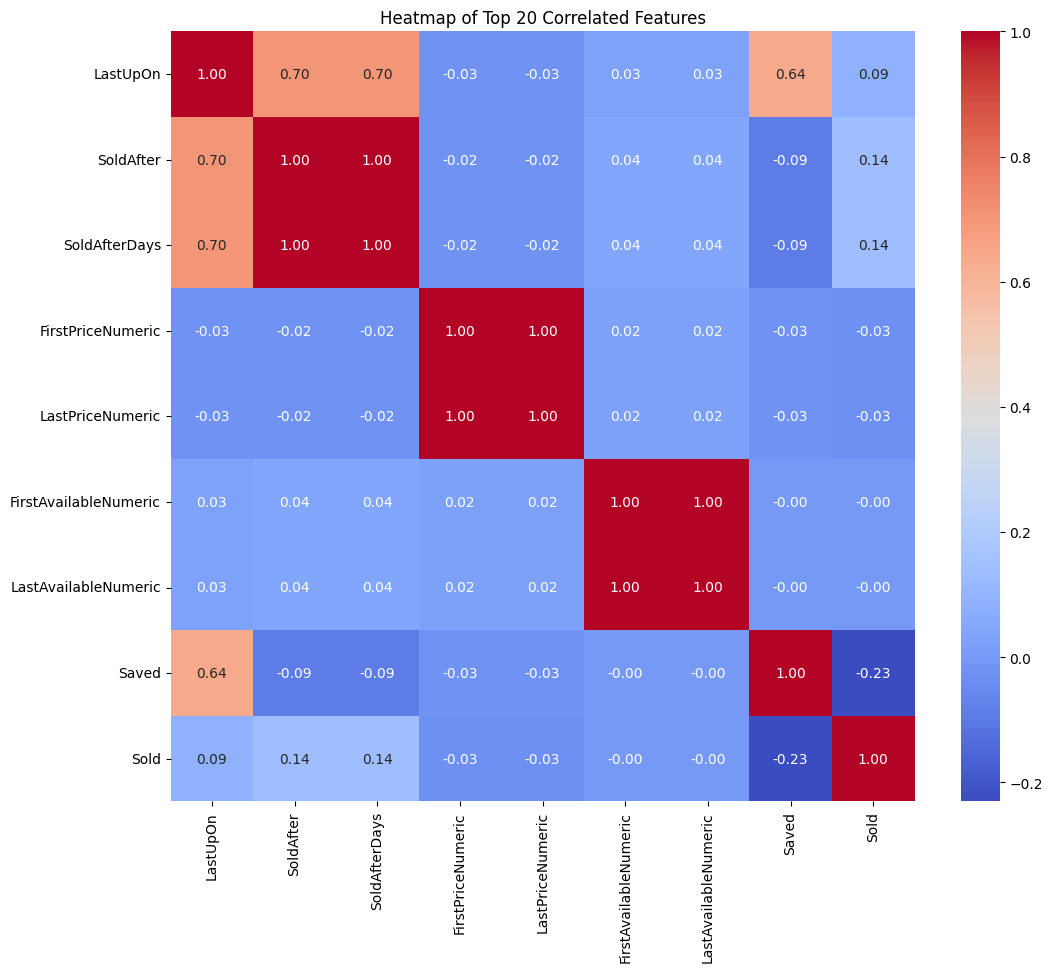

,LastUpOn,SoldAfter,SoldAfterDays,FirstPriceNumeric,LastPriceNumeric,FirstAvailableNumeric,LastAvailableNumeric,Saved,Sold
LastUpOn,1.000000,0.703497,0.703497,-0.028336,-0.028336,0.025120,0.025120,0.641472,0.090735
SoldAfter,0.703497,1.000000,1.000000,-0.021156,-0.021156,0.039658,0.039658,-0.093935,0.137145
SoldAfterDays,0.703497,1.000000,1.000000,-0.021156,-0.021156,0.039658,0.039658,-0.093935,0.137145
FirstPriceNumeric,-0.028336,-0.021156,-0.021156,1.000000,1.000000,0.021908,0.021908,-0.026364,-0.029034
LastPriceNumeric,-0.028336,-0.021156,-0.021156,1.000000,1.000000,0.021908,0.021908,-0.026364,-0.029034
FirstAvailableNumeric,0.025120,0.039658,0.039658,0.021908,0.021908,1.000000,1.000000,-0.003823,-0.004491
LastAvailableNumeric,0.025120,0.039658,0.039658,0.021908,0.021908,1.000000,1.000000,-0.003823,-0.004491
Saved,0.641472,-0.093935,-0.093935,-0.026364,-0.026364,-0.003823,-0.003823,1.000000,-0.230616
Sold,0.090735,0.137145,0.137145,-0.029034,-0.029034,-0.004491,-0.004491,-0.230616,1.000000


In [32]:
import pandas as pd
import seaborn as sns

correlation_matrix = german.drop(columns=["StockChange", "Nr"]).corr().abs()

# Calculate the average correlation for each column
avg_correlation = correlation_matrix.mean().sort_values(ascending=False)

# Select the top 20 columns
top_20_columns = avg_correlation.head(20).index

# Get the correlation matrix for the top 20 columns
top_20_correlation_matrix = german[top_20_columns].corr()

# Display the top 20 correlation matrix
top_20_correlation_matrix

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_20_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Top 20 Correlated Features')
plt.show()

# Since we can't display the heatmap directly in this environment, we'll return the correlation matrix.
top_20_correlation_matrix

Nothing interesting here


### Danemark
#### No Date Available in the scraping

Index(['Unnamed: 0', 'Category', 'Category_1', 'Subcategory', 'Quantity', 'LastPrice',
        'Saved', 'LastUpOn', 'FirstPrice', 'PriceChange', 'Description',
        'Year of manufacture', 'Year of manufacture_unit',
        'For built-in', 'Over rebated', 'With angle hinges', 'Connected',
        'Press tested', 'Store', 'Country', 'Language', 'Danish_Raw'],
       dtype='object')
       

In [33]:
danish.Category.unique()

array(['Doors and  Windows', 'Lamps and Lighting', 'Timber and Floors',
       'Masonry Materials', 'Plumbing and Kitchen',
       'Miscellaneous Used Items'], dtype=object)

In [34]:
danish = danish[~danish["Category"].isin(['Lamps and Lighting','Plumbing and Kitchen'])]

In [35]:
print("The timeframe is ", min(danish.Saved), " to ", max(danish.LastUpOn))

The timeframe is  2023-03-02  to  2023-11-06


In [36]:
danish['Saved'] = pd.to_datetime(danish['Saved'])
danish['LastUpOn'] = pd.to_datetime(danish['LastUpOn'])
danish["SoldAfterDays"] = (danish["LastUpOn"] - danish["Saved"]).dt.days
danish["SoldAfterDays"][danish['LastUpOn'] == max(danish['LastUpOn'])] = np.nan


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [37]:
revenue = np.sum(danish.LastPrice[~danish.LastUpOn.isna()])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 6841622.75


In [38]:
# Calculate the percentage of NaN values in each column
nan_percentage = danish.isnull().mean()

# Drop columns with more than 50% NaN values
columns_to_drop = nan_percentage[nan_percentage > 0.5].index
df_dropped = danish.drop(columns=columns_to_drop)

danish = df_dropped
danish.Quantity =  danish.Quantity.str.extract(r'(\d+)')[0].astype(float)
danish["Sold"] = np.nan

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


# Identify categorical columns and convert them to dummy variables
categorical_columns = ['Category', 'Subcategory', 'material_emb', 'Store', 'Danish_Raw']  # Update with your categorical columns
non_numeric_columns = ['Quantity', 'LastPrice']

danish.Sold[danish.SoldAfterDays!=1] = 0
danish.Sold[danish.SoldAfterDays>0] = 1

df = danish[categorical_columns].copy()


df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target
X = pd.concat([danish[non_numeric_columns], df_dummies], axis=1) # Replace 'Sold' with your target column name
y = danish['Sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42, scale_pos_weight=13)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy: 0.9445843828715366
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.17      0.29        53
         1.0       0.94      1.00      0.97       741

    accuracy                           0.94       794
   macro avg       0.97      0.58      0.63       794
weighted avg       0.95      0.94      0.93       794



Bad results recall and F1-score because we have a really imbalanced DataFrame with really little not sold items.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


danish_reg = danish.dropna(subset=['SoldAfterDays'])
# Identify categorical columns and convert them to dummy variables
categorical_columns = ['Category', 'Subcategory', 'material_emb', 'Store', 'Danish_Raw']  # Update with your categorical columns
non_numeric_columns = ['Quantity', 'LastPrice']

df = danish_reg[categorical_columns].copy()

df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target
X = pd.concat([danish_reg[non_numeric_columns], df_dummies], axis=1) # Replace 'Sold' with your target column name
y = danish_reg['SoldAfterDays']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBRegressor(random_state=42, scale_pos_weight=13)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_regression

# Evaluate the predictions
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

mse, mae, r2

(3782.568592657451, 48.3399065989082, 0.3399430744288504)

Not good enough to predict days to be sold

In [41]:
import re
def extract_numeric(s):
    # Find all numeric patterns in the string
    number = re.findall(r'\b\d+\b', str(s))
    # Return them as a space-separated string (or however you'd like to format it)
    if len(number)==0:
        return np.nan
    else: 
        return int(number[0])

danish.Quantity = danish.Quantity.apply(extract_numeric)

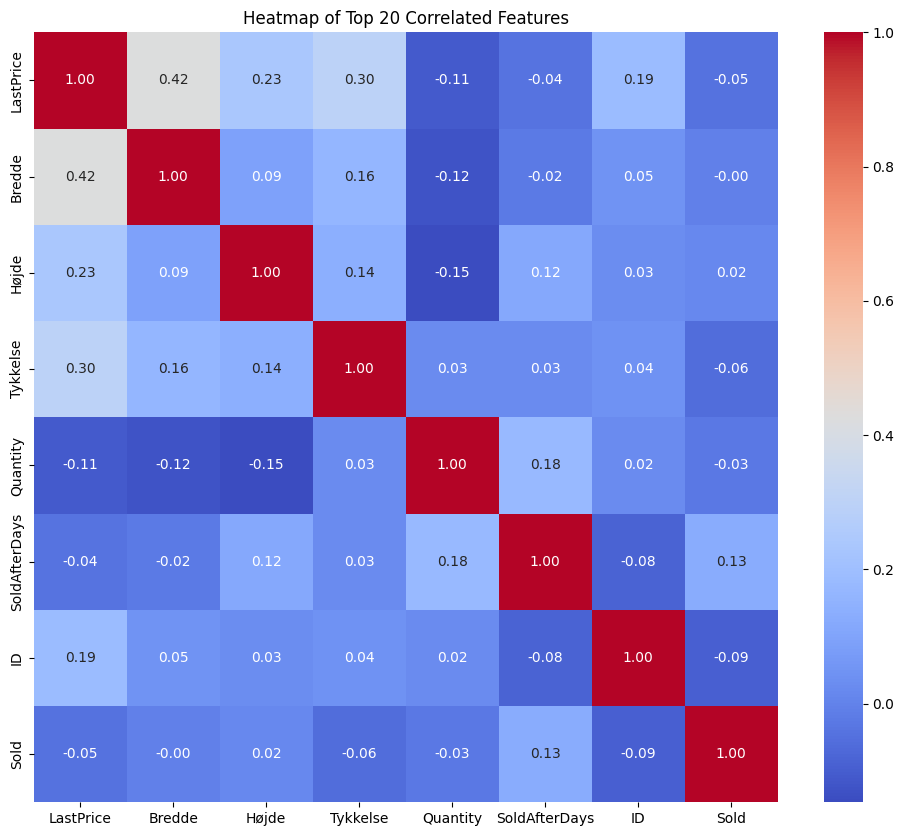

,LastPrice,Bredde,Højde,Tykkelse,Quantity,SoldAfterDays,ID,Sold
LastPrice,1.000000,0.423725,0.234812,0.298871,-0.108001,-0.042033,0.188555,-0.045168
Bredde,0.423725,1.000000,0.094731,0.164831,-0.124539,-0.023235,0.049105,-0.003762
Højde,0.234812,0.094731,1.000000,0.137467,-0.146819,0.116123,0.028426,0.017750
Tykkelse,0.298871,0.164831,0.137467,1.000000,0.027201,0.027639,0.042748,-0.061488
Quantity,-0.108001,-0.124539,-0.146819,0.027201,1.000000,0.178156,0.024788,-0.027550
SoldAfterDays,-0.042033,-0.023235,0.116123,0.027639,0.178156,1.000000,-0.084352,0.130436
ID,0.188555,0.049105,0.028426,0.042748,0.024788,-0.084352,1.000000,-0.093429
Sold,-0.045168,-0.003762,0.017750,-0.061488,-0.027550,0.130436,-0.093429,1.000000


In [42]:
import pandas as pd


import pandas as pd
import seaborn as sns

correlation_matrix = danish.corr().abs()

# Calculate the average correlation for each column
avg_correlation = correlation_matrix.mean().sort_values(ascending=False)

# Select the top 20 columns
top_20_columns = avg_correlation.head(20).index

# Get the correlation matrix for the top 20 columns
top_20_correlation_matrix = danish[top_20_columns].corr()

# Display the top 20 correlation matrix
top_20_correlation_matrix

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_20_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Top 20 Correlated Features')
plt.show()

# Since we can't display the heatmap directly in this environment, we'll return the correlation matrix.
top_20_correlation_matrix

### Belgium

In [43]:
belgium.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Title', 'Weight', 'Weight_Units',
       'Product_Units', 'Description', 'Category', 'URL', 'Imagefile',
       'Initial_Price', 'Latest_Price', 'Initial_Stock', 'Stock_Now',
       'Condition', 'Dates_Available', 'Material', 'Dimensions', 'Technical',
       'Collection', 'Last_Up_On', 'Price_Change', 'Quantity_Change', 'Date',
       'Country', 'Store', 'Language', 'Sold', 'Sold_After', 'material', 'dim',
       'quantity_n', 'material_emb', 'Belgium_Raw'],
      dtype='object')

In [44]:
belgium.Category.unique()

array(['Bricks', 'Ceiling', 'Doors', 'Droguerie', 'Floors', 'Furniture',
       'Garden', 'Hardware', 'Insulation', 'Lighting', 'Objet Trouvé',
       'Per building', 'Sanitary', 'Stairs', 'Technical', 'Wall Cladding',
       'Wood', 'Cloisons', 'Electricités et luminaires', 'Insolite',
       'Matière brute', 'Mobilier', 'Portes et fenêtres', 'Quincaillerie',
       'Sanitaires', 'Scénographie', 'Sol et plafond', 'Techniques',
       'Per Building', 'Brick', 'Door', 'Floor', 'Maintenance', 'Roof'],
      dtype=object)

In [45]:
belgium = belgium[~belgium["Category"].isin(['Electricités et luminaires','Insolite', 'Quincaillerie', 'Hardware', 'Lighting', 'Furniture'])]

In [46]:
belgium['Date'] = pd.to_datetime(belgium['Date'])
belgium['Last_Up_On'] = pd.to_datetime(belgium['Last_Up_On'])
belgium["SoldAfterDays"] = (belgium["Last_Up_On"] - belgium["Date"]).dt.days
belgium["SoldAfterDays"][belgium['Last_Up_On'] == max(belgium['Last_Up_On'])] = np.nan


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [47]:
revenue = np.sum(belgium.Latest_Price[~belgium.Last_Up_On.isna()])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 34608.25


In [48]:
belgium_date = []
count_entity = []
price_sold = []
for item in belgium.Belgium_Raw.unique():
    belgium_df = belgium.dropna(subset="SoldAfterDays")
    date = belgium_df.SoldAfterDays[belgium_df.Belgium_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    belgium_date.append(np.mean(date))

df_belgium = pd.DataFrame({"Belgium_Raw": belgium.Belgium_Raw.unique(), "SoldAfterDays": belgium_date, "CountEntity":count_entity}).dropna()
    

In [49]:
df_belgium

,Belgium_Raw,SoldAfterDays,CountEntity
0,Baryte bricks,79.0,3
1,Engineering bricks,146.0,1
3,balustrade,146.0,1
4,Aluminium frame roof window units,146.0,1
5,Lead bricks,45.5,2
...,...,...,...
114,Furniture trolleys,0.0,1
117,Cross-laminated timber beams,59.0,1
118,Glazing plastics framed panels,59.0,1
121,Shower fittings package,0.0,1


In [50]:
belgium['Weight'] = pd.to_numeric(belgium['Weight'].str.replace('[^0-9.]', '', regex=True).str.replace(',', ''), errors='coerce')
belgium['Initial_Price'] = pd.to_numeric(belgium['Initial_Price'].str.replace('[^0-9.]', '', regex=True).str.replace(',', ''), errors='coerce')

print(belgium[['Weight', 'Initial_Price']].dtypes)

Weight           float64
Initial_Price    float64
dtype: object


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


categorical_columns = ['Category', 'Condition', "Belgium_Raw", 'material_emb']  # Update with your categorical columns
numeric_columns = ['Weight','Latest_Price']

df = belgium[categorical_columns+numeric_columns]

df_dummies = pd.get_dummies(df, columns=categorical_columns)


# Separate features and target
X = df_dummies # Replace 'Sold' with your target column name
y = belgium['Sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.7469135802469136
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78        90
           1       0.74      0.67      0.70        72

    accuracy                           0.75       162
   macro avg       0.75      0.74      0.74       162
weighted avg       0.75      0.75      0.75       162



Good

                                               Feature  Importance
300                 material_emb_Granite-powder cement    0.178091
9                                       Category_Floor    0.155192
192                         Belgium_Raw_Terrazzo tiles    0.087142
356                            material_emb_Terracotta    0.079183
315  material_emb_Loose surfacing decorative aggreg...    0.066972
..                                                 ...         ...
131                            Belgium_Raw_Metal sways    0.000000
130                        Belgium_Raw_Metal skirtings    0.000000
129                     Belgium_Raw_Metal infill units    0.000000
128                      Belgium_Raw_Medicine cabinets    0.000000
369                               material_emb_Wychert    0.000000

[370 rows x 2 columns]


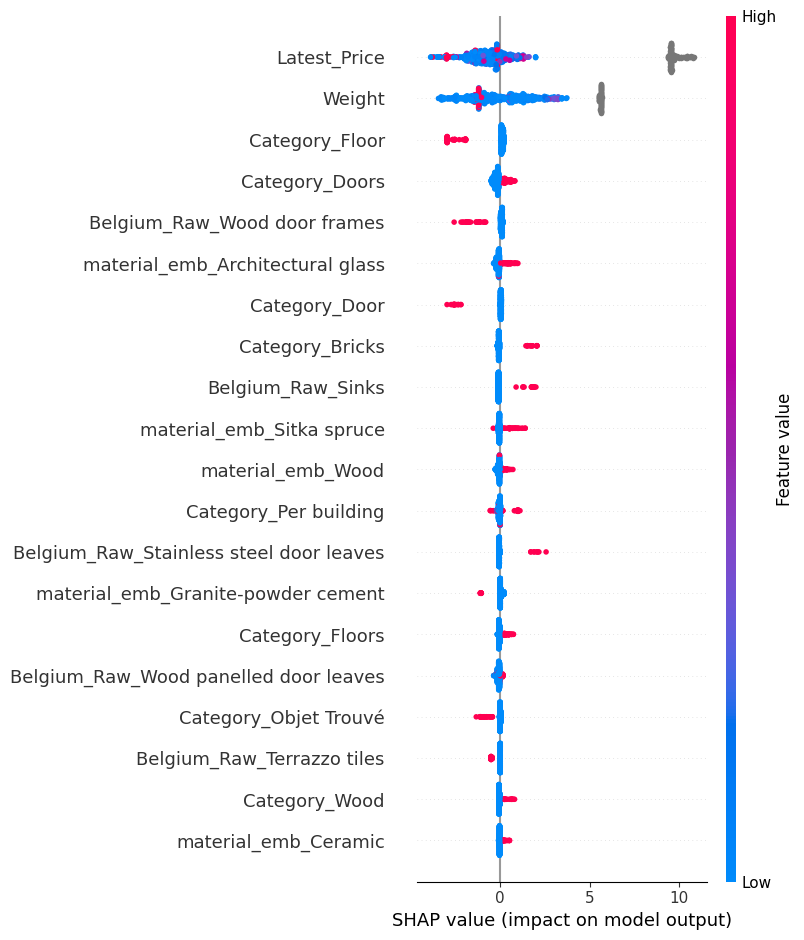

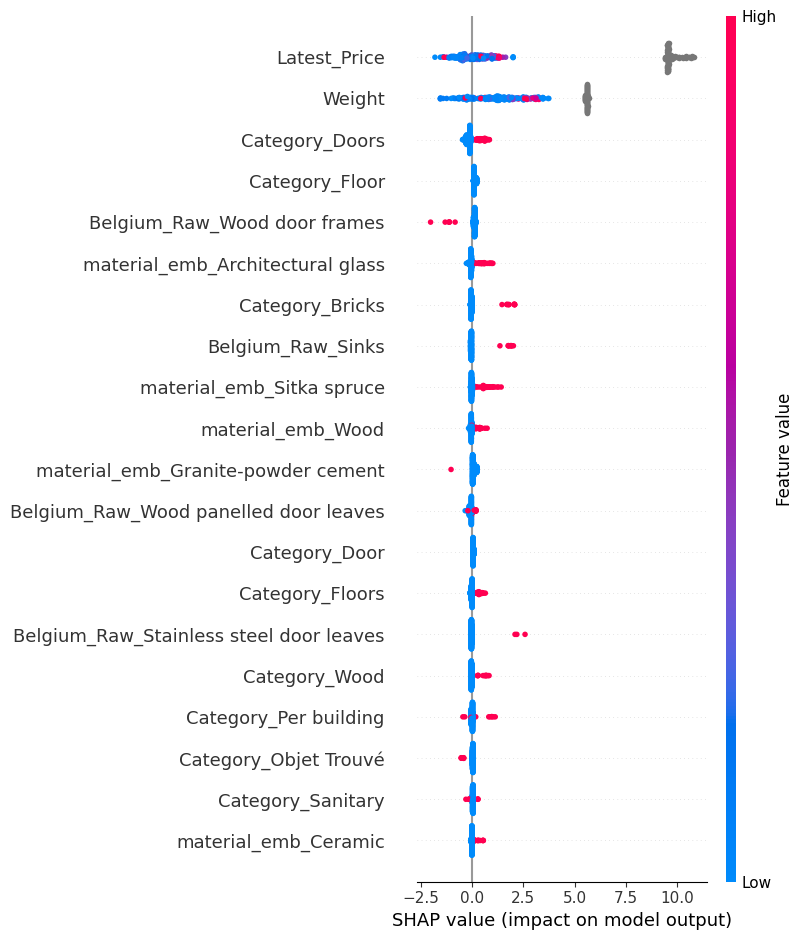

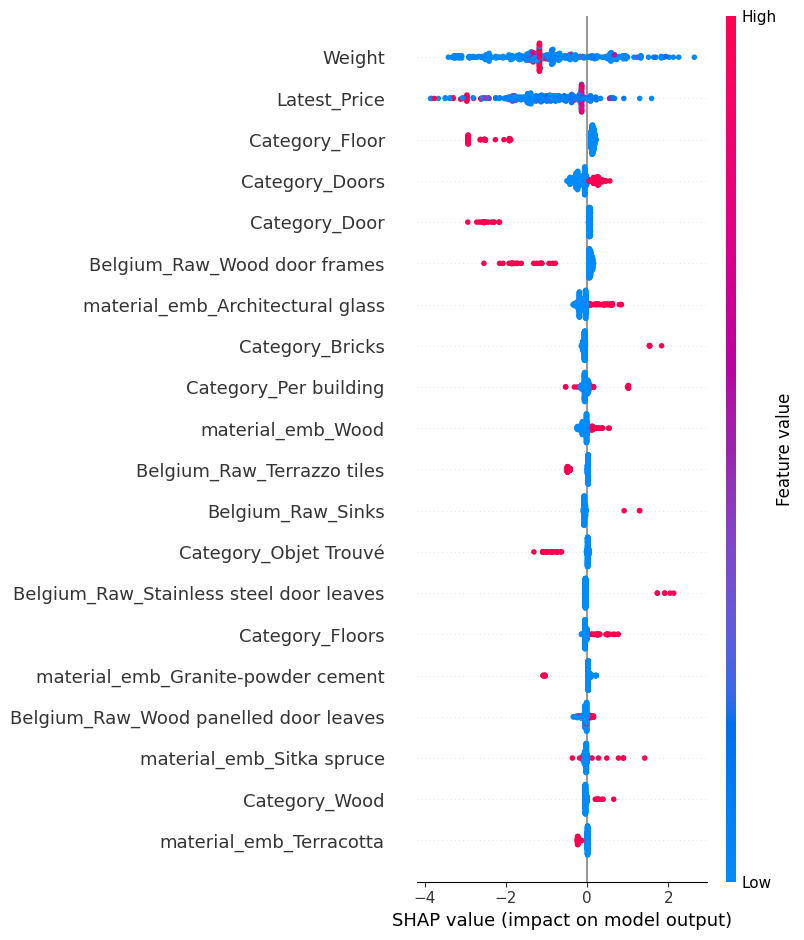

In [52]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display
print(feature_importances)
import shap

explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

In [53]:
df_belgium = df_belgium[df_belgium.CountEntity > 5]
df_belgium['Rank_SoldAfterDays'] = df_belgium['SoldAfterDays'].rank(method='min', ascending=True)
df_belgium['Rank_CountEntity'] = df_belgium['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df_belgium['Score'] = (df_belgium['Rank_SoldAfterDays']) + df_belgium['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df_belgium.sort_values(by='Score', ascending=True)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [54]:
successful_objects[['Belgium_Raw', 'SoldAfterDays', 'CountEntity', 'Score']]

,Belgium_Raw,SoldAfterDays,CountEntity,Score
87,Wood panelled door leaves,37.637931,58,2.0
31,Stone tiles,43.615385,13,6.0
85,Wood door frames,41.300000,10,7.0
82,Laminboard core plywoods,40.666667,6,9.0
26,Ceramic tiles,50.000000,9,10.0
56,Sinks,103.909091,11,10.0
57,Bathroom cabinets,66.666667,9,11.0


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


belgium_reg = belgium.dropna(subset=['SoldAfterDays'])

# Identify categorical columns and convert them to dummy variables
categorical_columns = ['Category', 'Condition', "Belgium_Raw", 'material_emb']  # Update with your categorical columns
numeric_columns = ['Weight','Latest_Price']

df = belgium_reg[categorical_columns].copy()

df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target
X = pd.concat([belgium_reg[numeric_columns], df_dummies], axis=1)
y = belgium_reg['SoldAfterDays']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBRegressor(random_state=42, scale_pos_weight=13)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_regression

# Evaluate the predictions
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

mse, mae, r2

(4000.9543744291987, 50.335947555965845, -0.4305739626697127)

Not good

### French

In [56]:
french.columns

Index(['Unnamed: 0', 'id', 'title', 'description', 'material_state',
       'category', 'BIM_class', 'location', 'date_published', 'price_initial',
       'price_latest', 'price_change', 'imagefiles', 'material_type', 'co2',
       'avoided_waste', 'quantity_initial', 'quantity_latest', 'disappeared',
       'country', 'sold', 'sold_after', 'material_emb', 'French_Raw'],
      dtype='object')

In [57]:
french.location = french.location.astype(str)
french.sold[french.sold!=1] = 0
french.sold[french.sold>0] = 1



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [118]:
unique_categories = french.French_Raw.unique()

In [59]:
uni_mat_pr[uni_mat_pr.Group == 25]

,Code,Group,Sub group,Section,Object,Sub object,Title,NBS Code,COBie,NRM1,IFC 2x3 TC1,IFC 4Add2 TC1,CESMM
1553,Pr_25,25,NaN,NaN,NaN,NaN,Skin products,NaN,Pr_25 : Skin products,NaN,NaN,NaN,NaN
1554,Pr_25_30,25,30.0,NaN,NaN,NaN,Fixed access products,NaN,Pr_25_30 : Fixed access products,NaN,NaN,NaN,NaN
1555,Pr_25_30_30,25,30.0,30.0,NaN,NaN,"Floor plates, gratings and edgings",NaN,"Pr_25_30_30 : Floor plates, gratings and edgings",NaN,NaN,NaN,NaN
1556,Pr_25_30_30_01,25,30.0,30.0,1.0,NaN,Aluminium cold-formed planks,45-30-40/310 Aluminium cold formed planks,Pr_25_30_30_01 : Aluminium cold-formed planks,NaN,NaN,NaN,NaN
1557,Pr_25_30_30_02,25,30.0,30.0,2.0,NaN,Aluminium duckboards,NaN,Pr_25_30_30_02 : Aluminium duckboards,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,Pr_25_96_35_37,25,96.0,35.0,37.0,NaN,Headwall and outfall grilles,90-05-20/444 Protective outfall and headwall g...,Pr_25_96_35_37 : Headwall and outfall grilles,NaN,NaN,NaN,NaN
2415,Pr_25_96_35_53,25,96.0,35.0,53.0,NaN,Metal armouring grilles,45-85-70/420 Metal armouring grilles,Pr_25_96_35_53 : Metal armouring grilles,NaN,NaN,NaN,NaN
2416,Pr_25_96_35_71,25,96.0,35.0,71.0,NaN,Recycled plastics cattle grids,45-20-80/307 Cattle grids,Pr_25_96_35_71 : Recycled plastics cattle grids,NaN,NaN,NaN,NaN
2417,Pr_25_96_35_76,25,96.0,35.0,76.0,NaN,Sewage screens,NaN,Pr_25_96_35_76 : Sewage screens,NaN,NaN,NaN,NaN


In [60]:
building_component = uni_mat_pr[uni_mat_pr.Group == 20]["Title"].to_list()
building_component = building_component + ifc.IFC.to_list()

In [61]:
building_component

['Structure and general products',
 'Fastener products',
 'Anchors and components',
 'Anchor blocks',
 'Anchor rails',
 'Carbon steel anchor plates',
 'Carbon steel chemical anchor rods',
 'Carbon steel chemical anchor sockets',
 'Carbon steel post base plates',
 'Carbon steel post spikes',
 'Cavity anchors',
 'Chemical anchor capsules',
 'Chemical anchor cartridges',
 'Chemical anchors',
 'Expansion anchors',
 'Fixing discs',
 'Framing anchors',
 'Framing fasteners',
 'Ground anchor heads',
 'Ground plate anchors',
 'Grouted ground anchors',
 'Hammer-in fasteners',
 'J-pins',
 'Lifting anchors',
 'Lifting hoops',
 'Prestressing anchors',
 'Rock bolts',
 'Rock dowels',
 'Socket anchors',
 'Split rings',
 'Sprayed concrete anchor studs',
 'Sprayed concrete ties',
 'Stainless steel anchor plates',
 'Stainless steel chemical anchor rods',
 'Stainless steel chemical anchor sockets',
 'Structural anchors',
 'Threaded anchors',
 'Undercut anchors',
 'Wedge anchors',
 'Angle fasteners',
 'Equ

In [62]:
french = french[french.French_Raw.isin(building_component)]

In [63]:
french.date_published = pd.to_datetime(french.date_published)
data = sorted(list(french.date_published))
print("French Table starts the " + str(data[0]) + " and ends the " + str(data[-1]))

French Table starts the 2020-12-01 00:00:00 and ends the 2023-10-30 00:00:00


In [64]:
revenue_idx = french.sold == 1
revenue = sum(french.price_latest[revenue_idx])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 96255.85000000002


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


categorical_columns = ['location', "French_Raw", "material_state", "BIM_class", "material_type"]  # Update with your categorical columns
numeric_columns = ['price_latest',"co2" ]
french.sold[french.sold!=1] = 0
french.sold[french.sold>0] = 1

df = french[categorical_columns+numeric_columns]

df_dummies = pd.get_dummies(df, columns=categorical_columns)


# Separate features and target
X = df_dummies # Replace 'Sold' with your target column name
y = french['sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy: 0.8754152823920266
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       404
         1.0       0.87      0.73      0.79       198

    accuracy                           0.88       602
   macro avg       0.87      0.84      0.85       602
weighted avg       0.87      0.88      0.87       602



                                  Feature  Importance
92       location_PARIS-9E-ARRONDISSEMENT    0.135526
26                        location_CHOLET    0.079529
35                       location_EPERNAY    0.061960
25                location_CHEVILLY-LARUE    0.060597
102                location_SAINT-ETIENNE    0.036132
..                                    ...         ...
362                    French_Raw_storage    0.000000
364  French_Raw_structural planar  action    0.000000
365                      French_Raw_strut    0.000000
366             French_Raw_superstructure    0.000000
457               BIM_class_B.20.20.05.1d    0.000000

[915 rows x 2 columns]


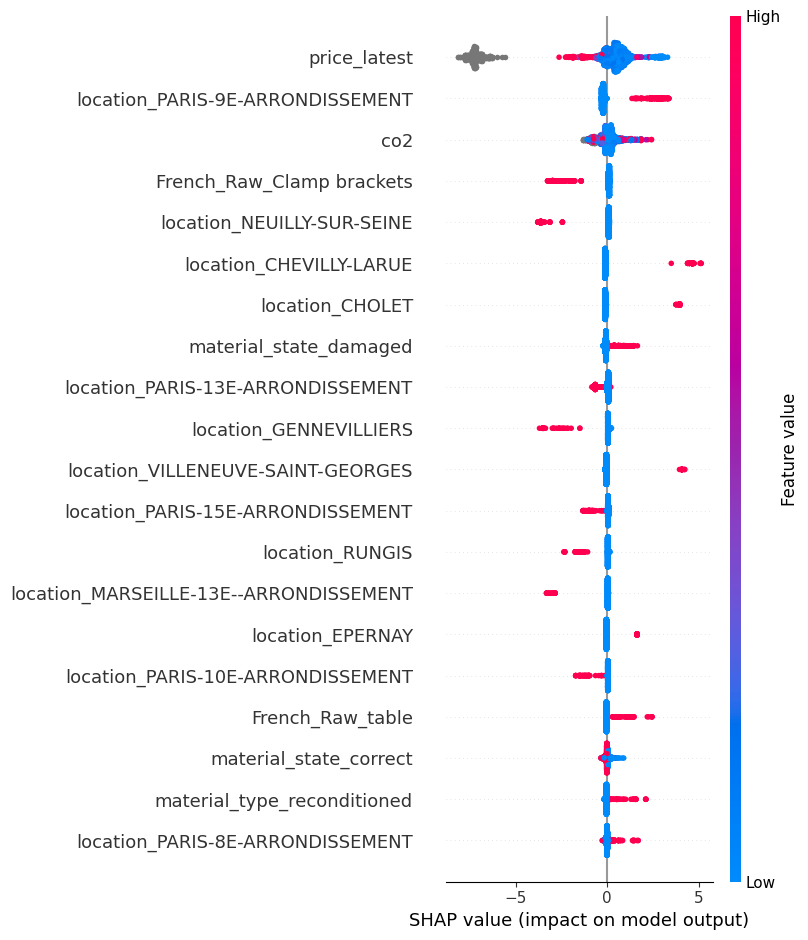

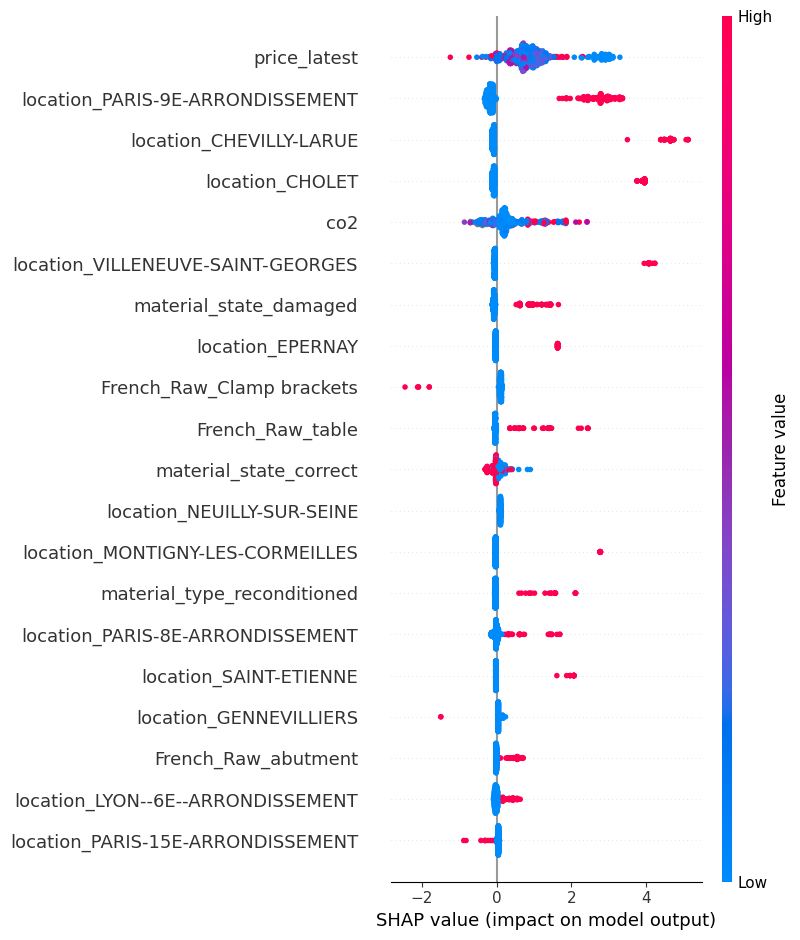

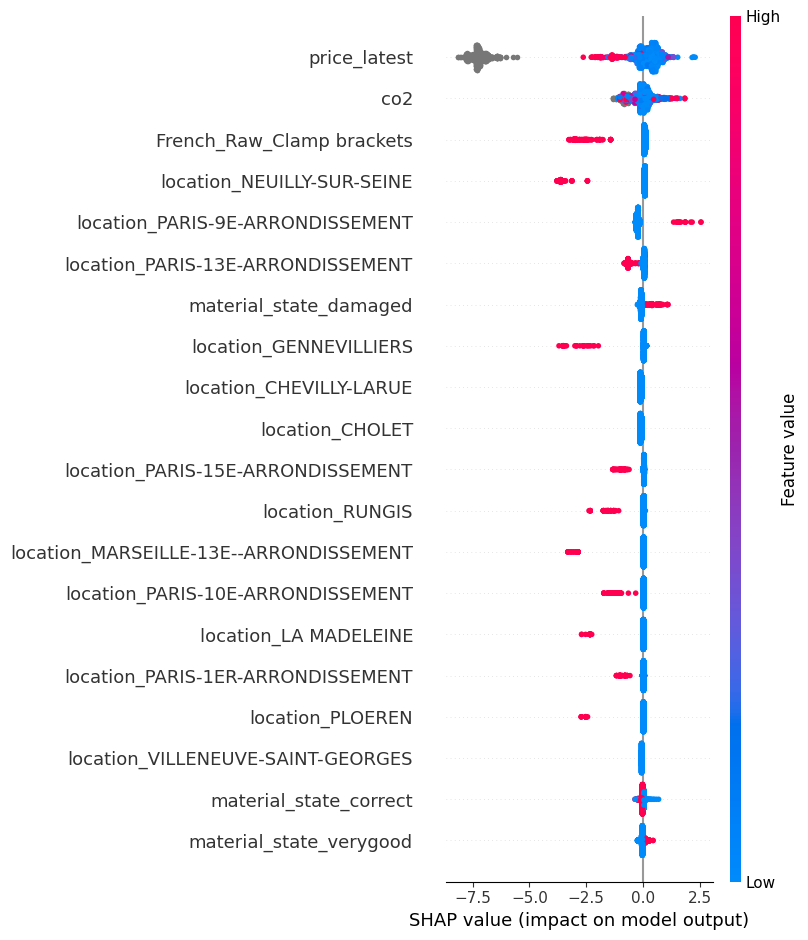

In [66]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display
print(feature_importances)
import shap

explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

In [67]:
french_date = []
count_entity = []
price_sold = []
for item in french.French_Raw.unique():
    french_df = french.dropna(subset="sold_after")
    date = french_df.sold_after[french_df.French_Raw == item]

    count_entity.append(len(date))
    french_date.append(np.mean(date))

df = pd.DataFrame({"French_Raw": french.French_Raw.unique(), "SoldAfterDays": french_date, "CountEntity":count_entity}).dropna()

Abderrahmane, do we have a lot of outliers? Because in this case we have at first to take them away for success rate calculation. Other option is to calculate additionaly - Average Daily Sales Rate= Number of Days/ Total Components Sold;  e.g. 500/25=20 components per day. 
Then we take as a benchmark - maximum sold - e.g. some 600 components for some component, ans so Sales Success Rate (%)=(Benchmark Sales/ Actual Sales)×100, e.g. (500/600)*100 = 83.33%

 to find the mininum and maximum for the time and minimum and maximum for the amount of all sold components on the marketplace (components, not lamps, furniture etc) - the worst result - 0% (not sold for a maximum available period of time, e.x. 365 days), 1% sold only 1 piece for a maximum amount of time comparing other components, and 100% for the best result (e.g. sold in one day). The simliar procent for amount: not sold - 0%, sold 1 piece - 1%, sold the maximum we see for some component, e.g. 88, assign as 100%. So, on a scale 0-1 we will have for every components’ group % for amount and time. E.g. for some X components 30% time, 50% amount, then we divide it by these 2 variables, meaning (0.3+0.5)/2

In [68]:
df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects[['French_Raw', 'SoldAfterDays', 'CountEntity', 'Score']]

,French_Raw,SoldAfterDays,CountEntity,Score
0,table,92.328358,67,9.0
13,chair,97.192308,78,11.0
16,abutment,101.941860,86,12.0
39,tee,92.473684,38,13.0
73,g fa,60.857143,14,16.0
72,caisson,65.076923,13,18.0
45,parapet,99.800000,20,19.0
78,suspender,85.454545,11,22.0
87,rafter,71.250000,8,26.0
99,finned,83.250000,8,27.0


In [145]:
french[french.French_Raw == "g fa"]

,Unnamed: 0,id,title,description,material_state,category,BIM_class,location,date_published,price_initial,...,co2,avoided_waste,quantity_initial,quantity_latest,disappeared,country,sold,sold_after,material_emb,French_Raw
768,768,81edee76-3e7b-4ce6-9a97-193c6242fea0,Fauteuil,"Fauteuil en Bois, disponible au RDC du Bât A, ...",correct,seated,E.20.20.06.5c,CHOLET,2022-11-24,22.5,...,0.0,7.20,5.0,5.0,2023-03-13,FR,1.0,122.0,Pisé,g fa
1065,1065,5aa07ed9-a6ed-46db-a478-14470c9a638d,Fauteuil,Fauteuil en Bois,damaged,seated,E.20.20.06.5c,CHEVILLY-LARUE,2022-12-16,5.0,...,0.0,7.20,3.0,3.0,2023-03-14,FR,1.0,100.0,Pisé,g fa
1315,1315,015fa025-7544-400e-9b42-770e206dd903,Fauteuil,Fauteuil en cuir avec accoudoirs en bois.,correct,seated,E.20.20.06.5c,PARIS-9E-ARRONDISSEMENT,2023-02-14,85.0,...,0.0,7.20,4.0,4.0,2023-04-03,FR,1.0,56.0,Pisé,g fa
1335,1335,0824e494-4005-4005-860c-5ef804abf504,Fauteuil,Fauteuil structure en bois.,verygood,seated,E.20.20.06.5g,PARIS-9E-ARRONDISSEMENT,2023-02-15,100.0,...,0.0,5.40,8.0,8.0,2023-03-31,FR,1.0,55.0,Pisé,g fa
1345,1345,0bbf3769-0f6f-44df-90e3-fa7e226fdaff,Fauteuil,"Chaise assise en tissu rouge, structure en aci...",verygood,seated,E.20.20.06.4g,PARIS-9E-ARRONDISSEMENT,2023-02-15,23.0,...,0.0,4.96,4.0,4.0,2023-03-29,FR,1.0,55.0,Pisé,g fa
1367,1367,1411c5a1-f3a0-44b7-944e-36b63c6b3a64,Fauteuil,Fauteuil en cuir noir avec accoudoirs.,correct,seated,E.20.20.06.5a,PARIS-9E-ARRONDISSEMENT,2023-02-14,85.0,...,0.0,5.50,15.0,15.0,2023-03-28,FR,1.0,56.0,Pisé,g fa
1484,1484,4996e9d9-3721-4564-93a6-7e1ed5733fa0,Fauteuil,Fauteuil en cuir noir.,verygood,seated,E.20.20.06.5g,PARIS-9E-ARRONDISSEMENT,2023-02-15,85.0,...,0.0,5.40,1.0,1.0,2023-03-30,FR,1.0,55.0,Pisé,g fa
1704,1704,b08ba913-5c57-40eb-81f3-bf8a3ffb5a02,Fauteuil,"Fauteuil sur 1 pied, en PVC blanc.",verygood,seated,E.20.20.06.5e,PARIS-9E-ARRONDISSEMENT,2023-02-15,45.0,...,0.0,3.50,3.0,3.0,2023-03-27,FR,1.0,55.0,Pisé,g fa
1713,1713,b94d9aca-a82e-41e7-a2dc-dd3f42056fba,Fauteuil,"Fauteuil de bureau à roulettes, blanc.",verygood,seated,E.20.20.06.5g,PARIS-9E-ARRONDISSEMENT,2023-02-15,95.0,...,0.0,5.40,20.0,20.0,2023-03-28,FR,1.0,55.0,Pisé,g fa
1725,1725,c0d70396-7a76-49d1-9cc9-3b7d98b1a821,Fauteuil,"Fauteuil en similicuir gris, accoudoirs en bois.",verygood,seated,E.20.20.06.5g,PARIS-9E-ARRONDISSEMENT,2023-02-15,55.0,...,0.0,5.40,3.0,3.0,2023-03-28,FR,1.0,55.0,Pisé,g fa


In [69]:
best_objects = df.sort_values(by='Score', ascending=True)
best_objects[:15]

,French_Raw,SoldAfterDays,CountEntity,Rank_SoldAfterDays,Rank_CountEntity,Score
0,table,92.328358,67,6.0,3.0,9.0
13,chair,97.192308,78,9.0,2.0,11.0
16,abutment,101.941860,86,11.0,1.0,12.0
39,tee,92.473684,38,7.0,6.0,13.0
73,g fa,60.857143,14,1.0,15.0,16.0
72,caisson,65.076923,13,2.0,16.0,18.0
45,parapet,99.800000,20,10.0,9.0,19.0
78,suspender,85.454545,11,5.0,17.0,22.0
87,rafter,71.250000,8,3.0,23.0,26.0
99,finned,83.250000,8,4.0,23.0,27.0


In [70]:
worst_objects = df.sort_values(by='Score', ascending=False)
worst_objects[:15]

,French_Raw,SoldAfterDays,CountEntity,Rank_SoldAfterDays,Rank_CountEntity,Score
18,water,259.000000,6,36.0,29.0,65.0
32,Grommets,171.500000,6,31.0,29.0,60.0
28,shower,189.555556,9,33.0,20.0,53.0
17,miter,168.125000,8,30.0,23.0,53.0
11,computer,199.090909,11,34.0,17.0,51.0
56,quay,140.000000,6,21.0,29.0,50.0
50,distribution element,133.333333,6,20.0,29.0,49.0
8,suspension,180.090909,11,32.0,17.0,49.0
47,balustrade,132.666667,6,19.0,29.0,48.0
4,cable,252.000000,18,35.0,12.0,47.0


In [71]:
import pandas as pd


correlation_matrix = french.corr().abs()

# Calculate the average correlation for each column
avg_correlation = correlation_matrix.mean().sort_values(ascending=False)

# Select the top 20 columns
top_20_columns = avg_correlation.head(20).index

# Get the correlation matrix for the top 20 columns
top_20_correlation_matrix = french[top_20_columns].corr()

# Display the top 20 correlation matrix
top_20_correlation_matrix

,price_initial,price_latest,Unnamed: 0,sold,sold_after,co2,avoided_waste,quantity_latest,quantity_initial,price_change
price_initial,1.000000,0.999701,0.055820,-0.083713,-0.030322,0.535055,0.512366,-0.032890,-0.032389,-0.048135
price_latest,0.999701,1.000000,0.054573,-0.082794,-0.026799,0.535781,0.512633,-0.032910,-0.032410,-0.023696
Unnamed: 0,0.055820,0.054573,1.000000,-0.786745,-0.795435,0.007579,0.000840,0.030564,0.017151,-0.052940
sold,-0.083713,-0.082794,-0.786745,1.000000,NaN,-0.050686,-0.043437,-0.037751,-0.036062,0.040547
sold_after,-0.030322,-0.026799,-0.795435,NaN,1.000000,0.007569,0.057924,0.060148,0.065661,0.080860
co2,0.535055,0.535781,0.007579,-0.050686,0.007569,1.000000,0.109143,-0.026947,-0.028418,0.007538
avoided_waste,0.512366,0.512633,0.000840,-0.043437,0.057924,0.109143,1.000000,-0.018670,-0.018492,-0.014836
quantity_latest,-0.032890,-0.032910,0.030564,-0.037751,0.060148,-0.026947,-0.018670,1.000000,0.987822,0.000351
quantity_initial,-0.032389,-0.032410,0.017151,-0.036062,0.065661,-0.028418,-0.018492,0.987822,1.000000,0.000275
price_change,-0.048135,-0.023696,-0.052940,0.040547,0.080860,0.007538,-0.014836,0.000351,0.000275,1.000000


### Swiss

In [72]:
swiss.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Title', 'Condition', 'eBKP_H',
       'eBKP_H_EN', 'MateriuumCategory', 'Category', 'Category_1',
       'Subcategory', 'Description', 'Material', 'Length', 'Width', 'Height',
       'Diameter', 'Weight', 'Color', 'Energy_Efficiency', 'Availability',
       'FirstPrice', 'PriceOnDemand', 'Quantity', 'Saved', 'LastPrice',
       'LastUpOn', 'PriceChange', 'Sold', 'SoldAfter', 'Location', 'Provider',
       'Store', 'ID', 'Country', 'Language', 'Imagefile', 'URL',
       'eBKP_H_Generalized', 'ElementType', 'Price', 'Stock', 'Dimensions',
       'material', 'dim', 'quantity_n', 'material_emb', 'Swiss_Raw'],
      dtype='object')

In [73]:
swiss.Category.unique()

array(['Gebäudehülle & Konstruktion', 'Gebäudetechnik & Sanitär',
       'Ausbau', 'Umgebung', 'Baustoffe & Werkzeuge', 'Sonstiges', nan,
       'D Technik Gebäude', 'J Ausstattung Gebäude',
       'F Bedachung Gebäude'], dtype=object)

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


categorical_columns = ['Category', "Swiss_Raw", "Condition", "Subcategory", "Material", "Energy_Efficiency"]  # Update with your categorical columns
numeric_columns = ['LastPrice', "Quantity"]
swiss.Sold[swiss.Sold!=1] = 0
swiss.Sold[swiss.Sold>0] = 1

df = swiss[categorical_columns+numeric_columns]

df_dummies = pd.get_dummies(df, columns=categorical_columns)


# Separate features and target
X = df_dummies # Replace 'Sold' with your target column name
y = swiss['Sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy: 0.9469964664310954
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.80      0.86       172
         1.0       0.95      0.99      0.97       677

    accuracy                           0.95       849
   macro avg       0.94      0.89      0.91       849
weighted avg       0.95      0.95      0.95       849



                                 Feature  Importance
978                     Material_Keramik    0.144925
1001                   Material_gemischt    0.125068
983                      Material_Metall    0.072641
871                  Condition_gebraucht    0.047730
977                        Material_Holz    0.044486
...                                  ...         ...
345                   Swiss_Raw_Lacquers    0.000000
346   Swiss_Raw_Laminboard core plywoods    0.000000
347              Swiss_Raw_Lamprey tiles    0.000000
348                      Swiss_Raw_Lamps    0.000000
1008                 Energy_Efficiency_G    0.000000

[1009 rows x 2 columns]


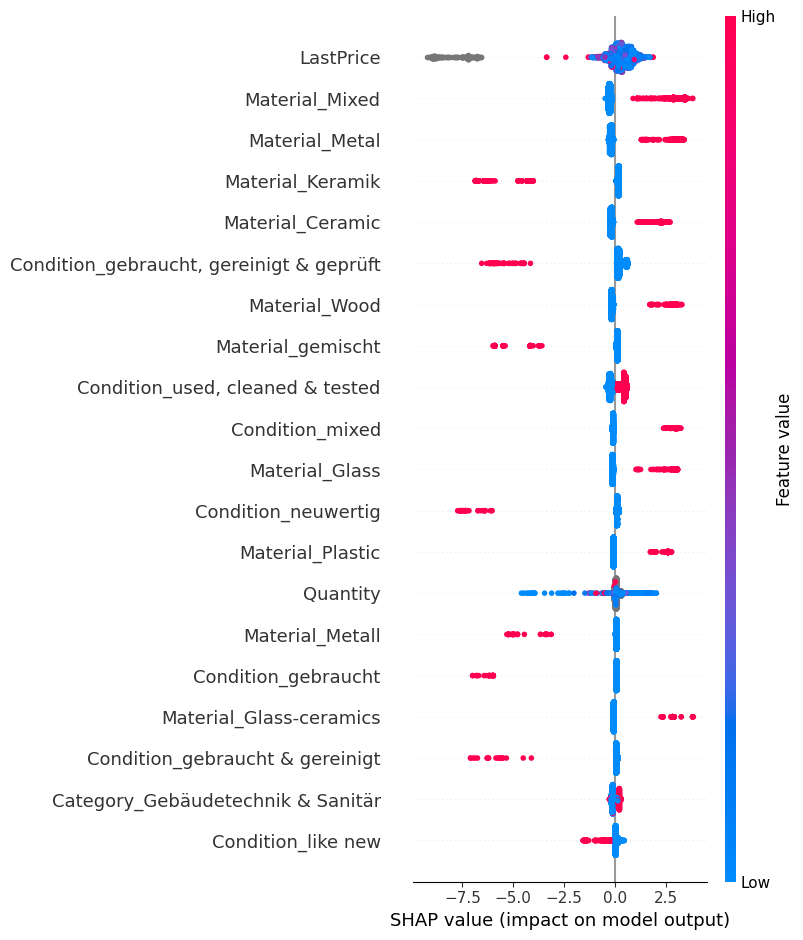

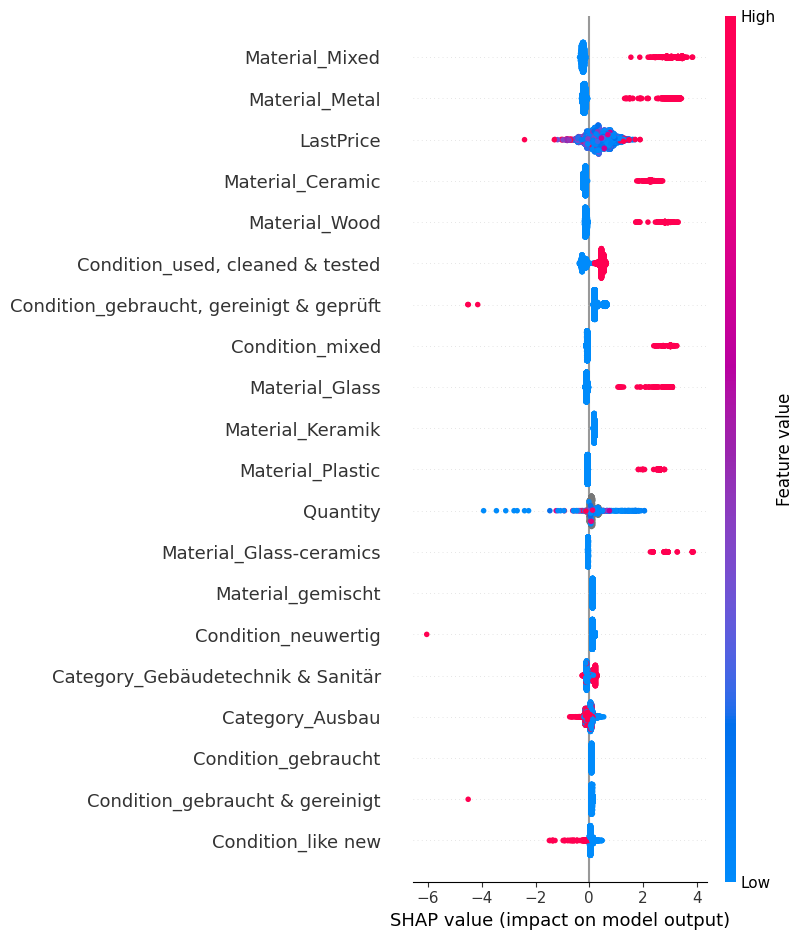

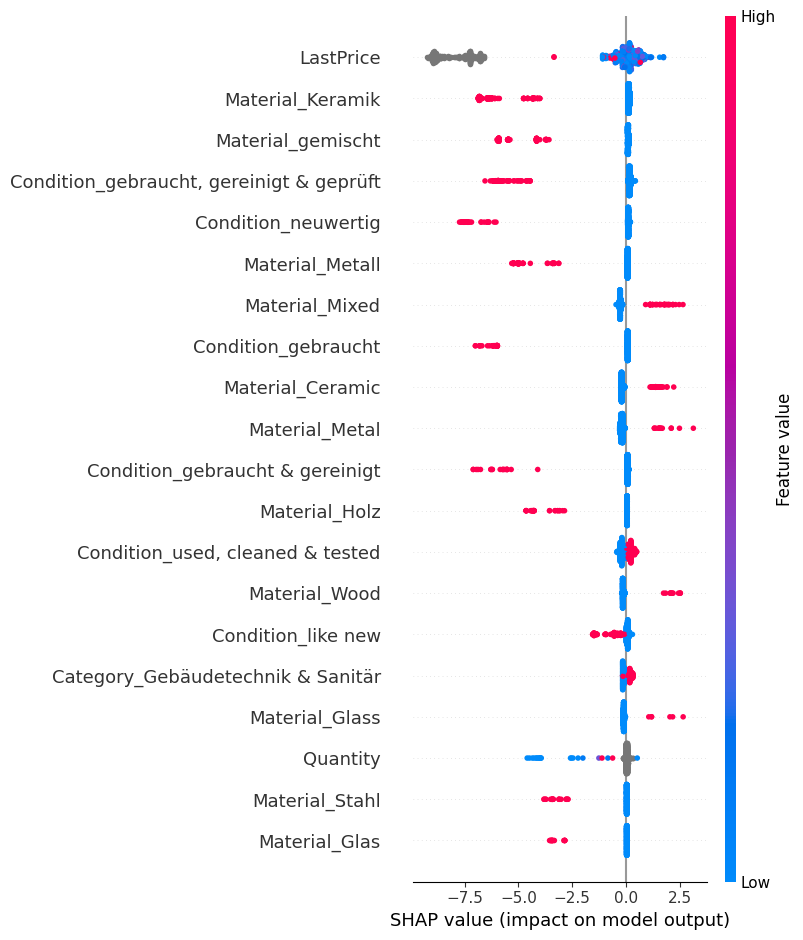

In [75]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display
print(feature_importances)
import shap

explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

In [76]:
swiss_date = []
count_entity = []
price_sold = []
for item in swiss.Swiss_Raw.unique():
    swiss_df = swiss.dropna(subset="SoldAfter")
    date = swiss_df.SoldAfter[swiss_df.Swiss_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    swiss_date.append(np.mean(date))

df = pd.DataFrame({"Swiss_Raw": swiss.Swiss_Raw.unique(), "SoldAfterDays": swiss_date, "CountEntity":count_entity}).dropna()

In [77]:
df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)

In [78]:
revenue_idx = swiss.Sold == 1
revenue = sum(swiss.LastPrice[revenue_idx])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 1149785.0


In [ ]:
Date - Swiss- Belgium and germany

## UK


In [105]:
uk.columns

Index(['Name', 'URL', 'Price', 'Business', 'Category', 'Subcategory',
       'Country', 'Location', 'Description', 'Dimensions', 'Age', 'ItemID',
       'SellerID', 'SellersStockID', 'DateOfListing', 'Imagefiles', 'LastUpOn',
       'material_emb', 'Uk_Raw', 'SoldAfterDays'],
      dtype='object')

In [106]:
uk['DateOfListing'] = pd.to_datetime(uk['DateOfListing'])
uk['LastUpOn'] = pd.to_datetime(uk['LastUpOn'])

In [107]:
uk = uk.dropna(subset=['DateOfListing','LastUpOn']) 

In [108]:
uk = uk[~uk["Subcategory"].isin(['Bathroom & Accessories', 'Garden', 'Shop, Pub, Church, Telephone Boxes & Bygones','Kitchen & Accessories','Various, Mixed, Misc And Other','Home accessories','Accessories','Reference'])]

In [109]:
uk["SoldAfterDays"] = (uk["LastUpOn"] - uk["DateOfListing"]).dt.days
uk["SoldAfterDays"][uk['LastUpOn'] == max(uk['LastUpOn'])] = np.nan
uk.Sold = [np.nan for i in range(0, len(uk)-1)]


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [114]:
uk.Category.unique()

array(['Antique & Reclaimed', 'NEW REPLICA REPRO', 'RECRAFT UPCYCLED'],
      dtype=object)

In [110]:
uk.Subcategory.unique()

array(['Doors & Handles', 'Windows & Accessories', 'Lighting',
       'Chimneypieces, Fireplaces & Grates', 'Architectural Metalwork',
       'Furniture & Mirrors', 'Timber', 'Flooring'], dtype=object)

In [101]:
uk = uk[~uk["Category"].isin(['Garden', 'Shop, Pub, Church, Telephone Boxes & Bygones','Kitchen & Accessories','Various, Mixed, Misc And Other','Home accessories','Accessories','Reference'])]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


categorical_columns = ['Category', "Swiss_Raw", "Condition", "Subcategory", "Material", "Energy_Efficiency"]  # Update with your categorical columns
numeric_columns = ['LastPrice', "Quantity"]
uk.Sold[uk.Sold!=1] = 0
uk.Sold[uk.Sold>0] = 1

df = swiss[categorical_columns+numeric_columns]

df_dummies = pd.get_dummies(df, columns=categorical_columns)


X = df_dummies # Replace 'Sold' with your target column name
y = uk['Sold']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

predictions = model_xgb.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy: 0.9469964664310954
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.80      0.86       172
         1.0       0.95      0.99      0.97       677

    accuracy                           0.95       849
   macro avg       0.94      0.89      0.91       849
weighted avg       0.95      0.95      0.95       849



In [103]:
revenue_idx = uk.Sold == 1
revenue = sum(uk.Price[revenue_idx])
print("The revenue generated over the studied timeframe is " + str(revenue))

AttributeError: 'DataFrame' object has no attribute 'Sold'

In [ ]:
MODELQA = False
if MODELQA:    
    def model_query(query, text):
        res = qa_model(question = query, context = text)
        return res
    french = pd.read_csv("data/french_.csv")
    descr_to_fill  = french
    from tqdm.auto import tqdm

    tqdm.pandas()

    #query = "What object is it?"
    #descr_to_fill["object"] = descr_to_fill.description.progress_apply(lambda x : model_query(query, x))
    #query = "What material is it?"
    #descr_to_fill["material"] = descr_to_fill.description.progress_apply(lambda x : model_query(query, x))
    #query = "What are the dimensions?"
    #descr_to_fill["dim"] = descr_to_fill.description.progress_apply(lambda x : model_query(query, x))
    #query = "What is the state between new,very good, correct or bad?"
    #descr_to_fill["state"] = descr_to_fill.description.progress_apply(lambda x : model_query(query, x))
    query = "What is the quantity?"
    descr_to_fill["quantity_n"] = descr_to_fill.description.progress_apply(lambda x : model_query(query, x))
    import numpy as np
    def extract(row):
        if row['score']>0.5:
            return row['answer']
        else:
            return np.nan

    descr_to_fill['quantity_n'] = descr_to_fill["quantity_n"].apply(extract)
    descr_to_fill.to_csv("data/french_.csv")
    #descr_to_fill = descr_to_fill.drop(columns=['Unnamed: 0'])
    #descr_to_fill = descr_to_fill.drop(columns=['Unnamed: 0.1'])
    descr_to_fill = descr_to_fill.drop(columns=['rate','diag_it','showroom','avoidedWastes','trustLevel','quantity','min_quantity', 'end_date', 'pickup_start_date', 'pickup_end_date', 'deposit_mode', 'date'])
    descr_to_fill = descr_to_fill.dropna(axis=1, how='all')

    missing_percentage = descr_to_fill.isnull().mean() * 100
    missing_percentage_df = pd.DataFrame(missing_percentage).reset_index()
    missing_percentage_df.columns = ['Column', 'Missing Percentage']

    missing_percentage_df
    descr_to_fill['date_published'] = pd.to_datetime(descr_to_fill['date_published'])
    descr_to_fill['disappeared'] = pd.to_datetime(descr_to_fill['disappeared'])
    descr_to_fill['duration_on_market'] = (descr_to_fill['disappeared'] - descr_to_fill['date_published']).dt.days

    missing_values_duration = descr_to_fill['duration_on_market'].isnull().sum()

    basic_stats = descr_to_fill.describe(include='all')

    correlations = descr_to_fill.corr()

    display(missing_values_duration)
    display(basic_stats)
    display(correlations)
    descr_to_fill = descr_to_fill.dropna(subset=["duration_on_market", "price_latest"])
    descr_to_fill.columns